In [55]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [56]:
df = pd.read_csv('/Users/johnhendricks/DATA SCIENCE PROJECT/ECON_FREEDOM_DATA.csv')

In [57]:
data = df.dropna()

In [58]:
data.corr()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
CountryID,1.000000,-0.024322,-0.017059,0.018444,0.100653,0.056725,0.061168,0.097138,-0.001746,-0.054788,...,-0.126448,-0.126870,-0.057443,-0.134745,-0.053562,0.015341,-0.057202,0.014213,0.121893,-0.083345
World Rank,-0.024322,1.000000,0.731422,-0.970512,-0.866212,-0.774972,-0.785248,0.092127,0.181947,-0.559045,...,-0.786237,0.597006,-0.045390,0.326204,-0.375790,-0.193403,-0.099060,0.012766,0.163444,0.039437
Region Rank,-0.017059,0.731422,1.000000,-0.728599,-0.556667,-0.598854,-0.581850,-0.040558,-0.131266,-0.310658,...,-0.591908,0.304624,-0.032665,0.144136,0.014186,0.107802,-0.049920,-0.088811,0.091154,0.103923
2019 Score,0.018444,-0.970512,-0.728599,1.000000,0.876601,0.805825,0.818174,-0.075163,-0.140741,0.559395,...,0.794123,-0.570917,0.040849,-0.321238,0.340777,0.146834,0.175203,0.054537,-0.289397,-0.052918
Property Rights,0.100653,-0.866212,-0.556667,0.876601,1.000000,0.826805,0.866998,-0.223515,-0.409670,0.329969,...,0.733347,-0.583775,0.137473,-0.320662,0.502051,0.420970,0.067604,-0.065005,-0.208512,0.094380
Judical Effectiveness,0.056725,-0.774972,-0.598854,0.805825,0.826805,1.000000,0.888880,-0.245655,-0.290839,0.287380,...,0.594981,-0.442500,0.181535,-0.227142,0.387056,0.297631,0.041256,-0.052041,-0.162887,0.074229
Government Integrity,0.061168,-0.785248,-0.581850,0.818174,0.866998,0.888880,1.000000,-0.286403,-0.400868,0.292240,...,0.640491,-0.458449,0.214602,-0.265604,0.429237,0.398067,-0.007990,-0.062151,-0.153959,0.106947
Tax Burden,0.097138,0.092127,-0.040558,-0.075163,-0.223515,-0.245655,-0.286403,1.000000,0.347073,-0.097799,...,-0.180520,0.013428,-0.898702,-0.551703,-0.582276,-0.311334,0.132233,0.213881,-0.010461,-0.234556
Gov't Spending,-0.001746,0.181947,-0.131266,-0.140741,-0.409670,-0.290839,-0.400868,0.347073,1.000000,0.046773,...,-0.274348,0.331539,-0.097165,0.271514,-0.712234,-0.983534,0.293568,0.333101,-0.010427,-0.159959
Fiscal Health,-0.054788,-0.559045,-0.310658,0.559395,0.329969,0.287380,0.292240,-0.097799,0.046773,1.000000,...,0.254980,-0.242237,0.090363,-0.078968,0.180969,-0.085589,0.219698,0.098731,-0.132109,-0.311699


<AxesSubplot:>

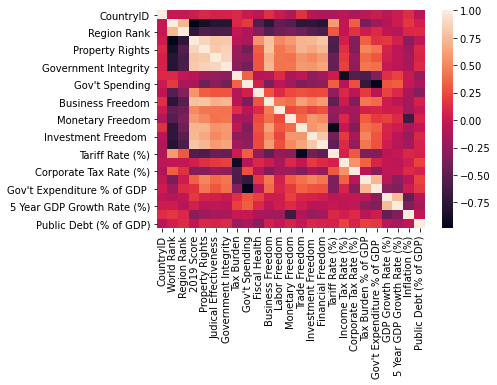

In [59]:
sns.heatmap(data.corr())

In [60]:
country_large = data.nlargest(15,['2019 Score'])

In [61]:
country_small = data.nsmallest(15, ['2019 Score'])

In [62]:
country_large.value_counts('Region')

Region
Europe                          7
Asia-Pacific                    5
Americas                        2
Middle East and North Africa    1
dtype: int64

In [63]:
country_small.value_counts('Region')

Region
Sub-Saharan Africa              8
Americas                        4
Asia-Pacific                    2
Middle East and North Africa    1
dtype: int64

In [156]:
region_small = country_small.groupby('Region').mean()

In [157]:
region_small

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
Region,,,,,,,,,,,,,,,,,,,,,
Americas,100.5,171.750,29.75,40.8000,28.2750,16.950,22.10,76.250,60.025,19.2250,...,30.00,7.950,30.0000,30.00,20.1000,36.150,-1.775,-0.4000,278.1750,50.725
Asia-Pacific,167.0,168.000,41.00,46.3000,30.6500,21.450,26.20,96.100,46.450,56.1500,...,15.00,2.250,10.0000,9.00,14.3500,36.950,3.000,5.5000,4.3000,14.400
Middle East and North Africa,3.0,171.000,14.00,46.2000,31.6000,36.200,28.90,76.400,48.700,18.7000,...,30.00,8.800,35.0000,23.00,24.5000,41.400,2.000,3.1000,5.6000,25.800
Sub-Saharan Africa,98.5,170.875,43.50,43.8625,31.8375,25.075,23.15,74.975,66.475,20.5125,...,28.75,10.775,31.0625,30.75,18.5625,31.475,1.925,2.3875,9.7375,86.075


In [65]:
region_large = country_large.groupby('Region').mean()

In [158]:
region_large

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
Region,,,,,,,,,,,,,,,,,,,,,
Americas,102.000000,10.0,1.5,77.250000,83.150000,74.000000,81.000000,75.950000,54.200000,68.100000,...,80.000000,1.650000,35.000000,18.000000,28.850000,39.050000,2.650000,2.150000,1.850000,98.750000
Asia-Pacific,101.000000,4.2,3.0,84.440000,90.040000,81.560000,84.940000,78.460000,76.420000,91.280000,...,80.000000,0.820000,32.000000,22.300000,19.380000,26.080000,3.100000,2.840000,1.320000,42.840000
Europe,100.142857,10.0,4.0,78.357143,86.642857,75.514286,83.085714,65.385714,48.971429,91.485714,...,77.142857,1.828571,40.828571,20.714286,34.257143,40.557143,3.485714,3.428571,1.628571,48.728571
Middle East and North Africa,173.000000,9.0,1.0,77.600000,81.800000,87.100000,78.800000,99.200000,68.800000,88.900000,...,60.000000,2.800000,0.000000,0.000000,8.900000,32.300000,0.500000,3.300000,2.000000,19.500000


In [66]:
df = data

In [67]:
region_mean = data.groupby('Region').mean()['2019 Score']

In [68]:
region_std = data.groupby('Region').std()['2019 Score']

In [69]:
region_ = data.groupby('Region').mean()

In [70]:
region_['std plus one'] = region_mean + region_std

In [71]:
region_['std minus one'] = region_mean - region_std

In [72]:
data['std plus one'] = data['Region'].map(region_['std plus one'])

In [73]:
data['std minus one'] = data['Region'].map(region_['std minus one'])

In [74]:
data['2019 tier'] = ""
for idx, row in data.iterrows():
    if row['2019 Score'] > row['std plus one']:
        data.at[idx,'2019 tier'] = "upper_tier"
    elif row['2019 Score'] < row['std minus one']:
        data.at[idx,'2019 tier'] = "bottom_tier" 
    else: 
        data.at[idx,'2019 tier'] = "middle_tier"

In [75]:
data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),std plus one,std minus one,2019 tier
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3,73.320804,51.789196,bottom_tier
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,3.9,2.5,"$12,507",13.9,2.0,"1,119.10",71.2,75.592766,61.737467,middle_tier
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,2.0,3.1,"$15,237",10,5.6,"1,203.00",25.8,70.581446,51.932839,bottom_tier
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,0.7,2.9,"$6,753",8.2,31.7,"-2,254.50",65.3,61.243795,46.808379,middle_tier
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,2.9,0.7,"$20,876",8.7,25.7,"11,857.00",52.6,71.286263,49.767070,middle_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,178,Vanuatu,Vanuatu,Asia-Pacific,116.0,26.0,56.4,65.9,36.4,51.9,...,4.2,2.4,"$2,739",5.2,3.1,24.7,48.4,73.320804,51.789196,middle_tier
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,-14.0,-7.8,"$12,114",7.7,1087.5,-68,34.9,71.286263,49.767070,bottom_tier
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,6.8,6.2,"$6,913",2.1,3.5,"14,100.00",58.2,73.320804,51.789196,middle_tier
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,3.6,4.0,"$3,996",7.8,6.6,"1,091.20",62.2,61.243795,46.808379,middle_tier


In [76]:
region_tier = data.groupby(['Region', '2019 tier']).mean()

In [77]:
region_tier

CountryID  World Rank  Region Rank  \
Region                       2019 tier                                          
Americas                     bottom_tier  100.500000  171.750000    29.750000   
                             middle_tier   79.521739   83.043478    15.565217   
                             upper_tier    79.000000   12.666667     2.000000   
Asia-Pacific                 bottom_tier  111.666667  162.666667    40.333333   
                             middle_tier  104.516129   95.516129    22.000000   
                             upper_tier   101.500000    7.166667     3.500000   
Europe                       bottom_tier   93.285714  104.285714    41.000000   
                             middle_tier   86.333333   46.888889    23.407407   
                             upper_tier    95.666667   11.444444     5.000000   
Middle East and North Africa bottom_tier   57.333333  160.000000    13.000000   
                             middle_tier   97.875000   90.000000     7.500000   
                             upper_tier   128.666667   21.333333     2.000000   
Sub-Saharan Africa           bottom_tier   81.500000  175.500000    45.500000   
                             middle_tier   91.702703  134.297297    25.000000   
                             upper_tier    67.400000   48.800000     3.000000   

                                          2019 Score  Property Rights  \
Region                       2019 tier                                  
Americas                     bottom_tier   40.800000        28.275000   
                             middle_tier   61.856522        48.504348   
                             upper_tier    76.633333        78.333333   
Asia-Pacific                 bottom_tier   48.033333        26.966667   
                             middle_tier   60.061290        52.432258   
                             upper_tier    82.700000        89.050000   
Europe                       bottom_tier   58.257143        54.357143   
                             middle_tier   68.314815        69.937037   
                             upper_tier    77.811111        83.933333   
Middle East and North Africa bottom_tier   49.466667        34.866667   
                             middle_tier   60.775000        53.912500   
                             upper_tier    74.333333        75.433333   
Sub-Saharan Africa           bottom_tier   40.000000        32.025000   
                             middle_tier   53.678378        36.827027   
                             upper_tier    67.820000        56.960000   

                                          Judical Effectiveness  \
Region                       2019 tier                            
Americas                     bottom_tier              16.950000   
                             middle_tier              40.908696   
                             upper_tier               68.100000   
Asia-Pacific                 bottom_tier              24.166667   
                             middle_tier              44.148387   
                             upper_tier               79.333333   
Europe                       bottom_tier              43.157143   
                             middle_tier              54.770370   
                             upper_tier               72.844444   
Middle East and North Africa bottom_tier              34.700000   
                             middle_tier              49.875000   
                             upper_tier               73.500000   
Sub-Saharan Africa           bottom_tier              22.650000   
                             middle_tier              35.059459   
                             upper_tier               57.560000   

                                          Government Integrity  Tax Burden  \
Region                       2019 tier                                       
Americas                     bottom_tier             22.100000   76.250000   
                             middle_tier         

In [78]:
data.groupby(['Region','2019 tier','Country',]).mean()

CountryID  World Rank  \
Region             2019 tier   Country                                
Americas           bottom_tier Bolivia               19       173.0   
                               Ecuador               49       170.0   
                               Suriname             155       165.0   
                               Venezuela            179       179.0   
                   middle_tier Argentina              5       148.0   
...                                                 ...         ...   
Sub-Saharan Africa upper_tier  Botswana              21        36.0   
                               Cabo Verde            30        73.0   
                               CÙte d'Ivoire         40        78.0   
                               Mauritius            109        25.0   
                               Rwanda               137        32.0   

                                              Region Rank  2019 Score  \
Region             2019 tier   Country                                  
Americas           bottom_tier Bolivia               30.0        42.3   
                               Ecuador               29.0        46.9   
                               Suriname              28.0        48.1   
                               Venezuela             32.0        25.9   
                   middle_tier Argentina             26.0        52.2   
...                                                   ...         ...   
Sub-Saharan Africa upper_tier  Botswana               3.0        69.5   
                               Cabo Verde             4.0        63.1   
                               CÙte d'Ivoire          5.0        62.4   
                               Mauritius              1.0        73.0   
                               Rwanda                 2.0        71.1   

                                              Property Rights  \
Region             2019 tier   Country                          
Americas           bottom_tier Bolivia                   20.5   
                               Ecuador                   35.9   
                               Suriname                  49.1   
                               Venezuela                  7.6   
                   middle_tier Argentina                 47.8   
...                                                       ...   
Sub-Saharan Africa upper_tier  Botswana                  58.1   
                               Cabo Verde                44.1   
                               CÙte d'Ivoire             40.9   
                               Mauritius                 69.5   
                               Rwanda                    72.2   

                                              Judical Effectiveness  \
Region             2019 tier   Country                                
Americas           bottom_tier Bolivia                         12.3   
                               Ecuador                         20.2   
                               Suriname                        22.2   
                               Venezuela                       13.1   
                   middle_tier Argentina                       44.5   
...                                                             ...   
Sub-Saharan Africa upper_tier  Botswana                        45.7   
                               Cabo Verde                      49.0   
                               CÙte d'Ivoire                   47.8   
                               Mauritius                       62.1   
                               Rwanda                          83.2   

                                              Government Integrity  \
Region             2019 tier   Country                               
Americas           bottom_tier Bolivia                        19.7   
                               Ecuador                        25.3   
                               Suriname                       35.5   
                               Venezuela            

In [87]:
region_mean1 = data.groupby('Region').mean()['Government Integrity']

In [88]:
region_std1 = data.groupby('Region').std()['Government Integrity']

In [89]:
region_['std1 plus one'] = region_mean1 + region_std1

In [90]:
region_['std1 minus one'] = region_mean1 - region_std1

In [91]:
data['std1 plus one'] = data['Region'].map(region_['std1 plus one'])

In [92]:
data['std1 minus one'] = data['Region'].map(region_['std1 minus one'])

In [93]:
data['Gov Integrity tier'] = ""
for idx, row in data.iterrows():
    if row['Government Integrity'] > row['std1 plus one']:
        data.at[idx,'Gov Integrity tier'] = "upper_tier"
    elif row['Government Integrity'] < row['std1 minus one']:
        data.at[idx,'Gov Integrity tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Gov Integrity tier'] = "middle_tier"

In [94]:
data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),std plus one,std minus one,2019 tier,std1 plus one,std1 minus one,Gov Integrity tier
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,8.8,5.0,53.9,7.3,73.320804,51.789196,bottom_tier,62.694043,22.560957,middle_tier
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,13.9,2.0,"1,119.10",71.2,75.592766,61.737467,middle_tier,77.310861,34.828674,middle_tier
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,10,5.6,"1,203.00",25.8,70.581446,51.932839,bottom_tier,65.118669,28.309903,middle_tier
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,8.2,31.7,"-2,254.50",65.3,61.243795,46.808379,middle_tier,40.876103,20.880419,bottom_tier
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,8.7,25.7,"11,857.00",52.6,71.286263,49.767070,middle_tier,55.689116,19.290884,middle_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,178,Vanuatu,Vanuatu,Asia-Pacific,116.0,26.0,56.4,65.9,36.4,51.9,...,5.2,3.1,24.7,48.4,73.320804,51.789196,middle_tier,62.694043,22.560957,middle_tier
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,7.7,1087.5,-68,34.9,71.286263,49.767070,bottom_tier,55.689116,19.290884,bottom_tier
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,2.1,3.5,"14,100.00",58.2,73.320804,51.789196,middle_tier,62.694043,22.560957,middle_tier
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,7.8,6.6,"1,091.20",62.2,61.243795,46.808379,middle_tier,40.876103,20.880419,middle_tier


In [97]:
data.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'std plus one', 'std minus one', '2019 tier',
       'std1 plus one', 'std1 minus one', 'Gov Integrity tier'],
      dtype='object')

In [111]:
region_mean2 = data.groupby('Region').mean()['Judical Effectiveness']

In [112]:
region_std2 = data.groupby('Region').std()['Judical Effectiveness']

In [113]:
region_['std2 plus one'] = region_mean2 + region_std2

In [114]:
region_['std2 minus one'] = region_mean2 - region_std2

In [115]:
data['std2 plus one'] = data['Region'].map(region_['std2 plus one'])

In [116]:
data['std2 minus one'] = data['Region'].map(region_['std2 minus one'])

In [117]:
data['Judical Effectiveness tier'] = ""
for idx, row in data.iterrows():
    if row['Judical Effectiveness'] > row['std2 plus one']:
        data.at[idx,'Judical Effectiveness tier'] = "upper_tier"
    elif row['Judical Effectiveness'] < row['std2 minus one']:
        data.at[idx,'Judical Effectiveness tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Judical Effectiveness tier'] = "middle_tier"

In [118]:
data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Public Debt (% of GDP),std plus one,std minus one,2019 tier,std1 plus one,std1 minus one,Gov Integrity tier,std2 plus one,std2 minus one,Judical Effectiveness tier
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,7.3,73.320804,51.789196,bottom_tier,62.694043,22.560957,middle_tier,67.107270,28.747730,middle_tier
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,71.2,75.592766,61.737467,middle_tier,77.310861,34.828674,middle_tier,72.304524,41.021057,bottom_tier
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,25.8,70.581446,51.932839,bottom_tier,65.118669,28.309903,middle_tier,67.074164,36.297264,bottom_tier
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,65.3,61.243795,46.808379,middle_tier,40.876103,20.880419,bottom_tier,48.266328,24.585846,middle_tier
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,52.6,71.286263,49.767070,middle_tier,55.689116,19.290884,middle_tier,57.994092,22.872575,middle_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,178,Vanuatu,Vanuatu,Asia-Pacific,116.0,26.0,56.4,65.9,36.4,51.9,...,48.4,73.320804,51.789196,middle_tier,62.694043,22.560957,middle_tier,67.107270,28.747730,middle_tier
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,34.9,71.286263,49.767070,bottom_tier,55.689116,19.290884,bottom_tier,57.994092,22.872575,bottom_tier
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,58.2,73.320804,51.789196,middle_tier,62.694043,22.560957,middle_tier,67.107270,28.747730,middle_tier
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,62.2,61.243795,46.808379,middle_tier,40.876103,20.880419,middle_tier,48.266328,24.585846,middle_tier


In [119]:
region_mean3 = data.groupby('Region').mean()['Property Rights']

In [120]:
region_std3 = data.groupby('Region').std()['Property Rights']

In [121]:
region_['std3 plus one'] = region_mean3 + region_std3

In [123]:
region_['std3 minus one'] = region_mean3 - region_std3

In [124]:
data['std3 plus one'] = data['Region'].map(region_['std3 plus one'])

In [125]:
data['std3 minus one'] = data['Region'].map(region_['std3 minus one'])

In [126]:
data['Property Rights tier'] = ""
for idx, row in data.iterrows():
    if row['Property Rights'] > row['std3 plus one']:
        data.at[idx,'Property Rights tier'] = "upper_tier"
    elif row['Property Rights'] < row['std3 minus one']:
        data.at[idx,'Property Rights tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Property Rights tier'] = "middle_tier"

In [128]:
region_mean4 = data.groupby('Region').mean()['Financial Freedom']

In [129]:
region_std4 = data.groupby('Region').std()['Financial Freedom']

In [130]:
region_['std4 plus one'] = region_mean4 + region_std4

In [131]:
region_['std4 minus one'] = region_mean4 - region_std4

In [132]:
data['std4 plus one'] = data['Region'].map(region_['std4 plus one'])

In [133]:
data['std4 minus one'] = data['Region'].map(region_['std4 minus one'])

In [134]:
data['Financial Freedom tier'] = ""
for idx, row in data.iterrows():
    if row['Financial Freedom'] > row['std4 plus one']:
        data.at[idx,'Financial Freedom tier'] = "upper_tier"
    elif row['Financial Freedom'] < row['std4 minus one']:
        data.at[idx,'Financial Freedom tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Financial Freedom tier'] = "middle_tier"

In [135]:
data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Gov Integrity tier,std2 plus one,std2 minus one,Judical Effectiveness tier,std3 plus one,std3 minus one,Property Rights tier,std4 plus one,std4 minus one,Financial Freedom tier
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,middle_tier,67.107270,28.747730,middle_tier,75.054238,36.975762,bottom_tier,65.839112,22.660888,bottom_tier
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,middle_tier,72.304524,41.021057,bottom_tier,84.116260,56.544206,bottom_tier,78.487506,48.024122,middle_tier
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,middle_tier,67.074164,36.297264,bottom_tier,69.983163,38.902552,bottom_tier,71.432797,34.281488,bottom_tier
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,bottom_tier,48.266328,24.585846,middle_tier,49.981372,27.214281,middle_tier,53.030523,26.534694,middle_tier
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,middle_tier,57.994092,22.872575,middle_tier,66.585027,30.994973,middle_tier,67.049492,34.950508,middle_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,178,Vanuatu,Vanuatu,Asia-Pacific,116.0,26.0,56.4,65.9,36.4,51.9,...,middle_tier,67.107270,28.747730,middle_tier,75.054238,36.975762,middle_tier,65.839112,22.660888,middle_tier
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,bottom_tier,57.994092,22.872575,bottom_tier,66.585027,30.994973,bottom_tier,67.049492,34.950508,bottom_tier
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,middle_tier,67.107270,28.747730,middle_tier,75.054238,36.975762,middle_tier,65.839112,22.660888,middle_tier
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,middle_tier,48.266328,24.585846,middle_tier,49.981372,27.214281,middle_tier,53.030523,26.534694,middle_tier


In [136]:
region_mean5 = data.groupby('Region').mean()['Trade Freedom']

In [137]:
region_std5 = data.groupby('Region').std()['Trade Freedom']

In [138]:
region_['std5 plus one'] = region_mean5 + region_std5

In [141]:
region_['std5 minus one'] = region_mean5 - region_std5

In [142]:
data['std5 plus one'] = data['Region'].map(region_['std5 plus one'])

In [143]:
data['std5 minus one'] = data['Region'].map(region_['std5 minus one'])

In [145]:
data['Trade Freedom tier'] = ""
for idx, row in data.iterrows():
    if row['Trade Freedom'] > row['std5 plus one']:
        data.at[idx,'Trade Freedom tier'] = "upper_tier"
    elif row['Trade Freedom'] < row['std5 minus one']:
        data.at[idx,'Trade Freedom tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Trade Freedom tier'] = "middle_tier"

In [147]:
region_mean6 = data.groupby('Region').mean()['GDP Growth Rate (%)']

In [148]:
region_std6 = data.groupby('Region').std()['GDP Growth Rate (%)']

In [149]:
region_['std6 plus one'] = region_mean6 + region_std6

In [150]:
region_['std6 minus one'] = region_mean6 - region_std6

In [151]:
data['std6 plus one'] = data['Region'].map(region_['std6 plus one'])

In [152]:
data['std6 minus one'] = data['Region'].map(region_['std6 minus one'])

In [153]:
data['GDP Growth tier'] = ""
for idx, row in data.iterrows():
    if row['GDP Growth Rate (%)'] > row['std6 plus one']:
        data.at[idx,'GDP Growth tier'] = "upper_tier"
    elif row['GDP Growth Rate (%)'] < row['std6 minus one']:
        data.at[idx,'GDP Growth tier'] = "bottom_tier" 
    else: 
        data.at[idx,'GDP Growth tier'] = "middle_tier"

In [189]:
data[data.columns[15:35]]

,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),std plus one
0,76.7,66.0,10.0,10.0,7.0,20.0,20.0,5.0,25.6,Afghanistan,35.5,$69.60,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3,73.320804
1,81.5,87.8,70.0,70.0,1.1,23.0,15.0,24.9,29.5,Albania,2.9,$36.00,3.9,2.5,"$12,507",13.9,2.0,"1,119.10",71.2,75.592766
2,74.9,67.4,30.0,30.0,8.8,35.0,23.0,24.5,41.4,Algeria,41.5,$632.90,2.0,3.1,"$15,237",10,5.6,"1,203.00",25.8,70.581446
3,55.4,61.2,30.0,40.0,9.4,17.0,30.0,20.6,25.3,Angola,28.2,$190.30,0.7,2.9,"$6,753",8.2,31.7,"-2,254.50",65.3,61.243795
4,60.2,70.0,55.0,60.0,7.5,35.0,30.0,30.8,41.0,Argentina,44.1,$920.20,2.9,0.7,"$20,876",8.7,25.7,"11,857.00",52.6,71.286263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,75.0,64.4,65.0,40.0,7.8,0.0,0.0,16.3,39.1,Vanuatu,0.3,$0.80,4.2,2.4,"$2,739",5.2,3.1,24.7,48.4,73.320804
181,0.0,60.0,0.0,10.0,10.0,34.0,34.0,14.9,37.4,Venezuela,31.4,$380.70,-14.0,-7.8,"$12,114",7.7,1087.5,-68,34.9,71.286263
182,68.9,79.2,30.0,40.0,2.9,35.0,22.0,18.0,29.4,Vietnam,93.6,$647.40,6.8,6.2,"$6,913",2.1,3.5,"14,100.00",58.2,73.320804
184,70.3,72.6,55.0,50.0,6.2,35.0,35.0,17.9,25.8,Zambia,17.2,$68.90,3.6,4.0,"$3,996",7.8,6.6,"1,091.20",62.2,61.243795


In [200]:
region_mean7 = data.groupby('Region').mean()['Public Debt (% of GDP)']

In [201]:
region_std7 = data.groupby('Region').std()['Public Debt (% of GDP)']

In [202]:
region_['std7 plus one'] = region_mean7 + region_std7

In [203]:
region_['std7 minus one'] = region_mean7 - region_std7

In [204]:
data['std7 plus one'] = data['Region'].map(region_['std7 plus one'])

In [205]:
data['std7 minus one'] = data['Region'].map(region_['std7 minus one'])

In [206]:
data['Public Debt tier'] = ""
for idx, row in data.iterrows():
    if row['Public Debt (% of GDP)'] > row['std7 plus one']:
        data.at[idx,'Public Debt tier'] = "upper_tier"
    elif row['Public Debt (% of GDP)'] < row['std7 minus one']:
        data.at[idx,'Public Debt tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Public Debt tier'] = "middle_tier"

In [207]:
data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Financial Freedom tier,std5 plus one,std5 minus one,Trade Freedom tier,std6 plus one,std6 minus one,GDP Growth tier,std7 plus one,std7 minus one,Public Debt tier
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,bottom_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,bottom_tier
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,middle_tier,87.677559,80.968952,upper_tier,5.232914,1.674062,middle_tier,94.391742,27.324537,middle_tier
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,bottom_tier,85.857944,68.542056,bottom_tier,3.865344,-0.193915,middle_tier,100.353492,22.646508,middle_tier
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,middle_tier,76.498980,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,middle_tier,82.953877,63.766123,middle_tier,5.221690,-1.615023,middle_tier,85.763865,29.976135,middle_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,178,Vanuatu,Vanuatu,Asia-Pacific,116.0,26.0,56.4,65.9,36.4,51.9,...,middle_tier,85.475669,65.939331,bottom_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,middle_tier
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,bottom_tier,82.953877,63.766123,bottom_tier,5.221690,-1.615023,bottom_tier,85.763865,29.976135,middle_tier
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,middle_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,upper_tier,88.050871,7.494129,middle_tier
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,middle_tier,76.498980,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier


In [160]:
region_tier1 = data.groupby(['Region', '2019 tier']).mean()

In [167]:
region_tier1[region_tier1.columns[4:15]]

Property Rights  \
Region                       2019 tier                      
Americas                     bottom_tier        28.275000   
                             middle_tier        48.504348   
                             upper_tier         78.333333   
Asia-Pacific                 bottom_tier        26.966667   
                             middle_tier        52.432258   
                             upper_tier         89.050000   
Europe                       bottom_tier        54.357143   
                             middle_tier        69.937037   
                             upper_tier         83.933333   
Middle East and North Africa bottom_tier        34.866667   
                             middle_tier        53.912500   
                             upper_tier         75.433333   
Sub-Saharan Africa           bottom_tier        32.025000   
                             middle_tier        36.827027   
                             upper_tier         56.960000   

                                          Judical Effectiveness  \
Region                       2019 tier                            
Americas                     bottom_tier              16.950000   
                             middle_tier              40.908696   
                             upper_tier               68.100000   
Asia-Pacific                 bottom_tier              24.166667   
                             middle_tier              44.148387   
                             upper_tier               79.333333   
Europe                       bottom_tier              43.157143   
                             middle_tier              54.770370   
                             upper_tier               72.844444   
Middle East and North Africa bottom_tier              34.700000   
                             middle_tier              49.875000   
                             upper_tier               73.500000   
Sub-Saharan Africa           bottom_tier              22.650000   
                             middle_tier              35.059459   
                             upper_tier               57.560000   

                                          Government Integrity  Tax Burden  \
Region                       2019 tier                                       
Americas                     bottom_tier             22.100000   76.250000   
                             middle_tier             35.304348   78.865217   
                             upper_tier              74.766667   76.400000   
Asia-Pacific                 bottom_tier             25.866667   94.633333   
                             middle_tier             37.012903   82.690323   
                             upper_tier              80.016667   79.650000   
Europe                       bottom_tier             35.014286   79.542857   
                             middle_tier             53.333333   70.851852   
                             upper_tier              80.655556   67.800000   
Middle East and North Africa bottom_tier             27.366667   83.033333   
                             middle_tier             43.475000   89.775000   
                             upper_tier              74.700000   86.933333   
Sub-Saharan Africa           bottom_tier             19.150000   68.625000   
                             middle_tier             29.767568   75.091892   
                             upper_tier              48.480000   81.700000   

                                          Gov't Spending  Fiscal Health  \
Region                       2019 tier                                    
Americas                     bottom_tier       60.025000      19.225000   
                             middle_tier       76.543478      72.534783   
                             upper_tier        63.133333      75.066667   
Asia-Pacific                 bottom_tier       57.733333      70.533333   
                             middle_tier       72.629032      67.316129   
            

In [171]:
region_tier1[region_tier1.columns[15:25]]

Financial Freedom  Tariff Rate (%)  \
Region                       2019 tier                                         
Americas                     bottom_tier          30.000000         7.950000   
                             middle_tier          51.304348         6.473913   
                             upper_tier           76.666667         1.300000   
Asia-Pacific                 bottom_tier          13.333333         3.833333   
                             middle_tier          41.290323         5.764516   
                             upper_tier           75.000000         1.350000   
Europe                       bottom_tier          40.000000         2.571429   
                             middle_tier          64.814815         2.259259   
                             upper_tier           76.666667         1.722222   
Middle East and North Africa bottom_tier          30.000000         9.000000   
                             middle_tier          57.500000         4.512500   
                             upper_tier           63.333333         3.000000   
Sub-Saharan Africa           bottom_tier          22.500000         9.400000   
                             middle_tier          39.189189         9.675676   
                             upper_tier           58.000000         5.560000   

                                          Income Tax Rate (%)  \
Region                       2019 tier                          
Americas                     bottom_tier            30.000000   
                             middle_tier            27.273913   
                             upper_tier             35.000000   
Asia-Pacific                 bottom_tier            13.333333   
                             middle_tier            24.222581   
                             upper_tier             30.833333   
Europe                       bottom_tier            22.142857   
                             middle_tier            31.555556   
                             upper_tier             38.644444   
Middle East and North Africa bottom_tier            30.000000   
                             middle_tier            14.312500   
                             upper_tier             16.000000   
Sub-Saharan Africa           bottom_tier            40.375000   
                             middle_tier            32.716216   
                             upper_tier             28.200000   

                                          Corporate Tax Rate (%)  \
Region                       2019 tier                             
Americas                     bottom_tier               30.000000   
                             middle_tier               27.000000   
                             upper_tier                20.333333   
Asia-Pacific                 bottom_tier               12.666667   
                             middle_tier               23.380645   
                             upper_tier                22.750000   
Europe                       bottom_tier               17.714286   
                             middle_tier               19.955556   
                             upper_tier                19.777778   
Middle East and North Africa bottom_tier               21.000000   
                             middle_tier               16.562500   
                             upper_tier                 7.666667   
Sub-Saharan Africa           bottom_tier               31.000000   
                             middle_tier               30.729730   
                             upper_tier                23.200000   

                                          Tax Burden % of GDP  \
Region                       2019 tier                          
Americas                     bottom_tier            20.100000   
                             middle_tier            21.891304   
                             upper_tier             26.033333   
Asia-Pacific                 bottom_tier            11.233333   
                            

In [209]:
data_group = data.groupby(['Region','2019 tier', 'Country']).mean()

In [215]:
data_americas = data_group.head(30)

In [245]:
data_americas

CountryID  World Rank  \
Region   2019 tier   Country                                                   
Americas bottom_tier Bolivia                                  19       173.0   
                     Ecuador                                  49       170.0   
                     Suriname                                155       165.0   
                     Venezuela                               179       179.0   
         middle_tier Argentina                                 5       148.0   
                     Bahamas                                  10        76.0   
                     Barbados                                 13        67.0   
                     Belize                                   16       123.0   
                     Brazil                                   22       150.0   
                     Colombia                                 35        49.0   
                     Costa Rica                               39        61.0   
                     Dominican Republic                       48        89.0   
                     El Salvador                              51        84.0   
                     Guatemala                                65        77.0   
                     Guyana                                   68       113.0   
                     Haiti                                    69       143.0   
                     Honduras                                 70        93.0   
                     Jamaica                                  81        39.0   
                     Mexico                                  110        66.0   
                     Nicaragua                               121       107.0   
                     Panama                                  127        50.0   
                     Paraguay                                129        85.0   
                     Peru                                    130        45.0   
                     Saint Lucia                             138        38.0   
                     Saint Vincent and the Grenadines        139        55.0   
                     Trinidad and Tobago                     167       112.0   
                     Uruguay                                 176        40.0   
         upper_tier  Canada                                   29         8.0   
                     Chile                                    33        18.0   
                     United States                           175        12.0   

                                                       Region Rank  \
Region   2019 tier   Country                                         
Americas bottom_tier Bolivia                                  30.0   
                     Ecuador                                  29.0   
                     Suriname                                 28.0   
                     Venezuela                                32.0   
         middle_tier Argentina                                26.0   
                     Bahamas                                  15.0   
                     Barbados                                 13.0   
                     Belize                                   24.0   
                     Brazil                                   27.0   
                     Colombia                                  8.0   
                     Costa Rica                               11.0   
                     Dominican Republic                       19.0   
                     El Salvador                              17.0   
                     Guatemala                                16.0   
                     Guyana                                   23.0   
                     Haiti                                    25.0   
                     Honduras                                 20.0   
                     Jamaica                                   5.0   
                     Mexico                                   12.0   
                     Nic

In [225]:
data_asiaPacific = data_group.iloc[31:70]

In [246]:
data_asiaPacific

CountryID  World Rank  \
Region       2019 tier   Country                                    
Asia-Pacific bottom_tier Timor-Leste              164       172.0   
                         Turkmenistan             170       164.0   
             middle_tier Azerbaijan                 9        60.0   
                         Bangladesh                12       121.0   
                         Bhutan                    18        74.0   
                         Brunei Darussalam        186        63.0   
                         Burma                     25       139.0   
                         Cambodia                  27       105.0   
                         China                     34       100.0   
                         Fiji                      56        81.0   
                         India                     74       129.0   
                         Indonesia                 75        56.0   
                         Japan                     82        30.0   
                         Kazakhstan                84        59.0   
                         Korea, South              88        29.0   
                         Kyrgyz Republic           90        79.0   
                         Lao P.D.R.                91       110.0   
                         Macau                    100        34.0   
                         Maldives                 105       141.0   
                         Mongolia                 113       126.0   
                         Nepal                    118       136.0   
                         Pakistan                 126       131.0   
                         Papua New Guinea         128       101.0   
                         Philippines              131        70.0   
                         Samoa                    140        82.0   
                         Solomon Islands          150       133.0   
                         Sri Lanka                153       115.0   
                         Tajikistan               161       122.0   
                         Thailand                 163        43.0   
                         Tonga                    166       108.0   
                         Uzbekistan               177       140.0   
                         Vanuatu                  178       116.0   
                         Vietnam                  180       128.0   
             upper_tier  Australia                  7         5.0   
                         Hong Kong SAR             71         1.0   
                         Malaysia                 104        22.0   
                         New Zealand              120         3.0   
                         Singapore                147         2.0   
                         Taiwan                   160        10.0   

                                            Region Rank  2019 Score  \
Region       2019 tier   Country                                      
Asia-Pacific bottom_tier Timor-Leste               42.0        44.2   
                         Turkmenistan              40.0        48.4   
             middle_tier Azerbaijan                13.0        65.4   
                         Bangladesh                27.0        55.6   
                         Bhutan                    16.0        62.9   
                         Brunei Darussalam         14.0        65.1   
                         Burma                     35.0        53.6   
                         Cambodia                  22.0        57.8   
                         China                     20.0        58.4   
                         Fiji                      18.0        62.2   
                         India                     31.0        55.2   
                         Indonesia                 11.0        65.8   
                         Japan                      8.0        72.1   
                         Kazakhstan                12.0        65.4   
                         Korea, South               7.0        72.3   
       

In [231]:
data_Europe = data_group.iloc[71:113]

In [247]:
data_Europe

CountryID  World Rank  Region Rank  \
Region 2019 tier   Country                                                      
Europe bottom_tier Croatia                        41        86.0         38.0   
                   Greece                         64       106.0         43.0   
                   Moldova                       112        97.0         40.0   
                   Montenegro                    114        92.0         39.0   
                   Russia                        136        98.0         41.0   
                   Ukraine                       172       147.0         44.0   
       middle_tier Albania                         2        52.0         27.0   
                   Armenia                         6        47.0         24.0   
                   Austria                         8        31.0         16.0   
                   Belgium                        15        48.0         25.0   
                   Bosnia and Herzegovina         20        83.0         37.0   
                   Bulgaria                       23        37.0         19.0   
                   Cyprus                         43        44.0         22.0   
                   Czech Republic                 44        23.0         13.0   
                   Finland                        57        20.0         11.0   
                   France                         58        71.0         35.0   
                   Germany                        62        24.0         14.0   
                   Hungary                        72        64.0         31.0   
                   Italy                          80        80.0         36.0   
                   Latvia                         92        35.0         18.0   
                   Lithuania                      98        21.0         12.0   
                   Macedonia                     101        33.0         17.0   
                   Malta                         107        41.0         20.0   
                   Norway                        124        26.0         15.0   
                   Poland                        132        46.0         23.0   
                   Portugal                      133        62.0         30.0   
                   Romania                       135        42.0         21.0   
                   Serbia                        144        69.0         34.0   
                   Slovak Republic               148        65.0         32.0   
                   Slovenia                      149        58.0         29.0   
                   Spain                         152        57.0         28.0   
                   Sweden                        157        19.0         10.0   
                   Turkey                        169        68.0         33.0   
       upper_tier  Denmark                        45        14.0          6.0   
                   Estonia                        54        15.0          7.0   
                   Georgia                        61        16.0          8.0   
                   Iceland                        73        11.0          4.0   
                   Ireland                        78         6.0          2.0   
                   Luxembourg                     99        17.0          9.0   
                   Netherlands                   119        13.0          5.0   
                   Switzerland                   158         4.0          1.0   
                   United Kingdom                174         7.0          3.0   

                                           2019 Score  Property Rights  \
Region 2019 tier   Country                                               
Europe bottom_tier Croatia                       61.4             66.0   
                   Greece                        57.7             52.4   
                   Moldova                       59.1             55.2   
                   Montenegro                    60.5             55.4   
                   Russia         

In [236]:
data_MidE_NAfr = data_group.iloc[114:127]

In [248]:
data_MidE_NAfr

CountryID  \
Region                       2019 tier   Country                           
Middle East and North Africa bottom_tier Iran                         76   
                                         Lebanon                      93   
                             middle_tier Bahrain                      11   
                                         Egypt                        50   
                                         Jordan                       83   
                                         Kuwait                       89   
                                         Morocco                     115   
                                         Oman                        125   
                                         Saudi Arabia                142   
                                         Tunisia                     168   
                             upper_tier  Israel                       79   
                                         Qatar                       134   
                                         United Arab Emirates        173   

                                                               World Rank  \
Region                       2019 tier   Country                            
Middle East and North Africa bottom_tier Iran                       155.0   
                                         Lebanon                    154.0   
                             middle_tier Bahrain                     54.0   
                                         Egypt                      144.0   
                                         Jordan                      53.0   
                                         Kuwait                      90.0   
                                         Morocco                     75.0   
                                         Oman                        88.0   
                                         Saudi Arabia                91.0   
                                         Tunisia                    125.0   
                             upper_tier  Israel                      27.0   
                                         Qatar                       28.0   
                                         United Arab Emirates         9.0   

                                                               Region Rank  \
Region                       2019 tier   Country                             
Middle East and North Africa bottom_tier Iran                         13.0   
                                         Lebanon                      12.0   
                             middle_tier Bahrain                       5.0   
                                         Egypt                        11.0   
                                         Jordan                        4.0   
                                         Kuwait                        8.0   
                                         Morocco                       6.0   
                                         Oman                          7.0   
                                         Saudi Arabia                  9.0   
                                         Tunisia                      10.0   
                             upper_tier  Israel                        2.0   
                                         Qatar                         3.0   
                                         United Arab Emirates          1.0   

                                                               2019 Score  \
Region                       2019 tier   Country                            
Middle East and North Africa bottom_tier Iran                        51.1   
                                         Lebanon                     51.1   
                             middle_tier Bahrain                     66.4   
                                         Egypt                       52.5   
                                         Jordan                      66.5   
                                         Kuwait         

In [244]:
data_SubAfr = data_group.iloc[128:173]

In [249]:
data_SubAfr

CountryID  \
Region             2019 tier   Country                                              
Sub-Saharan Africa bottom_tier Equatorial Guinea                               52   
                               Eritrea                                         53   
                               Zimbabwe                                       183   
                   middle_tier Angola                                           4   
                               Benin                                           17   
                               Burkina Faso                                    24   
                               Burundi                                         26   
                               Cameroon                                        28   
                               Central African Republic                        31   
                               Chad                                            32   
                               Comoros                                         36   
                               Congo, Democratic Republic of the Congo         37   
                               Djibouti                                        46   
                               Eswatini                                       156   
                               Ethiopia                                        55   
                               Gabon                                           59   
                               Gambia                                          60   
                               Ghana                                           63   
                               Guinea                                          66   
                               Guinea-Bissau                                   67   
                               Kenya                                           85   
                               Lesotho                                         94   
                               Liberia                                         95   
                               Madagascar                                     102   
                               Malawi                                         103   
                               Mali                                           106   
                               Mauritania                                     108   
                               Mozambique                                     116   
                               Namibia                                        117   
                               Niger                                          122   
                               Nigeria                                        123   
                               Senegal                                        143   
                               Sierra Leone                                   146   
                               South Africa                                   151   
                               Sudan                                          154   
                               S„o TomÈ and PrÌncipe                          141   
                               Tanzania                                       162   
                               Togo                                           165   
                               Uganda                                         171   
                               Zambia                                         182   
                   upper_tier  Botswana                                        21   
                               Cabo Verde                                      30   
                               CÙte d'Ivoire                                   40   
                               Mauritius                                      109   
                               Rwanda                                         137   

                                                                        Worl

In [255]:
data_americas1 = data_americas[data_americas.columns[2:15]]

In [256]:
data_americas2 = data_americas[data_americas.columns[15:25]]

In [257]:
data_asiaPacific1 = data_asiaPacific[data_asiaPacific.columns[2:15]]

In [259]:
data_asiaPacific2 = data_asiaPacific[data_asiaPacific.columns[15:25]]

In [260]:
data_Europe1 = data_Europe[data_Europe.columns[2:15]]

In [261]:
data_Europe2 = data_Europe[data_Europe.columns[15:25]]

In [262]:
data_MidE_NAfr1 = data_MidE_NAfr[data_MidE_NAfr.columns[2:15]]

In [263]:
data_MidE_NAfr2 = data_MidE_NAfr[data_MidE_NAfr.columns[15:25]]

In [264]:
data_SubAfr1 = data_SubAfr[data_SubAfr.columns[2:15]]

In [265]:
data_SubAfr2 = data_SubAfr[data_SubAfr.columns[15:25]]

In [922]:
data_MidE_NAfr1

Region Rank  \
Region                       2019 tier   Country                             
Middle East and North Africa bottom_tier Iran                         13.0   
                                         Lebanon                      12.0   
                             middle_tier Bahrain                       5.0   
                                         Egypt                        11.0   
                                         Jordan                        4.0   
                                         Kuwait                        8.0   
                                         Morocco                       6.0   
                                         Oman                          7.0   
                                         Saudi Arabia                  9.0   
                                         Tunisia                      10.0   
                             upper_tier  Israel                        2.0   
                                         Qatar                         3.0   
                                         United Arab Emirates          1.0   

                                                               2019 Score  \
Region                       2019 tier   Country                            
Middle East and North Africa bottom_tier Iran                        51.1   
                                         Lebanon                     51.1   
                             middle_tier Bahrain                     66.4   
                                         Egypt                       52.5   
                                         Jordan                      66.5   
                                         Kuwait                      60.8   
                                         Morocco                     62.9   
                                         Oman                        61.0   
                                         Saudi Arabia                60.7   
                                         Tunisia                     55.4   
                             upper_tier  Israel                      72.8   
                                         Qatar                       72.6   
                                         United Arab Emirates        77.6   

                                                               Property Rights  \
Region                       2019 tier   Country                                 
Middle East and North Africa bottom_tier Iran                             33.5   
                                         Lebanon                          39.5   
                             middle_tier Bahrain                          63.5   
                                         Egypt                            37.0   
                                         Jordan                           58.4   
                                         Kuwait                           52.9   
                                         Morocco                          57.2   
                                         Oman                             58.1   
                                         Saudi Arabia                     55.0   
                                         Tunisia                          49.2   
                             upper_tier  Israel                           80.0   
                                         Qatar                            64.5   
                                         United Arab Emirates             81.8   

                                                               Judical Effectiveness  \
Region                       2019 tier   Country                                       
Middle East and North Africa bottom_tier Iran                                   41.3   
                                         Lebanon                                26.6   
                             middle_tier Bahrain                                50.7   
                                         Egypt                   

In [923]:
data_Europe1

Region Rank  2019 Score  \
Region 2019 tier   Country                                           
Europe bottom_tier Croatia                        38.0        61.4   
                   Greece                         43.0        57.7   
                   Moldova                        40.0        59.1   
                   Montenegro                     39.0        60.5   
                   Russia                         41.0        58.9   
                   Ukraine                        44.0        52.3   
       middle_tier Albania                        27.0        66.5   
                   Armenia                        24.0        67.7   
                   Austria                        16.0        72.0   
                   Belgium                        25.0        67.3   
                   Bosnia and Herzegovina         37.0        61.9   
                   Bulgaria                       19.0        69.0   
                   Cyprus                         22.0        68.1   
                   Czech Republic                 13.0        73.7   
                   Finland                        11.0        74.9   
                   France                         35.0        63.8   
                   Germany                        14.0        73.5   
                   Hungary                        31.0        65.0   
                   Italy                          36.0        62.2   
                   Latvia                         18.0        70.4   
                   Lithuania                      12.0        74.2   
                   Macedonia                      17.0        71.1   
                   Malta                          20.0        68.6   
                   Norway                         15.0        73.0   
                   Poland                         23.0        67.8   
                   Portugal                       30.0        65.3   
                   Romania                        21.0        68.6   
                   Serbia                         34.0        63.9   
                   Slovak Republic                32.0        65.0   
                   Slovenia                       29.0        65.5   
                   Spain                          28.0        65.7   
                   Sweden                         10.0        75.2   
                   Turkey                         33.0        64.6   
       upper_tier  Denmark                         6.0        76.7   
                   Estonia                         7.0        76.6   
                   Georgia                         8.0        75.9   
                   Iceland                         4.0        77.1   
                   Ireland                         2.0        80.5   
                   Luxembourg                      9.0        75.9   
                   Netherlands                     5.0        76.8   
                   Switzerland                     1.0        81.9   
                   United Kingdom                  3.0        78.9   

                                           Property Rights  \
Region 2019 tier   Country                                   
Europe bottom_tier Croatia                            66.0   
                   Greece                             52.4   
                   Moldova                            55.2   
                   Montenegro                         55.4   
                   Russia                             52.4   
                   Ukraine                            43.9   
       middle_tier Albania                            54.8   
                   Armenia                            57.2   
                   Austria                            84.2   
                   Belgium                            81.3   
                   Bosnia and Herzegovina             40.2   
                   Bulgaria                           62.5   
                   Cyprus                             73.1   
                   Czech Republi

In [924]:
data_SubAfr1

Region Rank  \
Region             2019 tier   Country                                                
Sub-Saharan Africa bottom_tier Equatorial Guinea                               44.0   
                               Eritrea                                         47.0   
                               Zimbabwe                                        45.0   
                   middle_tier Angola                                          33.0   
                               Benin                                           21.0   
                               Burkina Faso                                     9.0   
                               Burundi                                         39.0   
                               Cameroon                                        29.0   
                               Central African Republic                        38.0   
                               Chad                                            36.0   
                               Comoros                                         20.0   
                               Congo, Democratic Republic of the Congo         34.0   
                               Djibouti                                        43.0   
                               Eswatini                                        23.0   
                               Ethiopia                                        26.0   
                               Gabon                                           17.0   
                               Gambia                                          30.0   
                               Ghana                                           13.0   
                               Guinea                                          19.0   
                               Guinea-Bissau                                   25.0   
                               Kenya                                           22.0   
                               Lesotho                                         28.0   
                               Liberia                                         37.0   
                               Madagascar                                      15.0   
                               Malawi                                          32.0   
                               Mali                                            12.0   
                               Mauritania                                      18.0   
                               Mozambique                                      40.0   
                               Namibia                                         10.0   
                               Niger                                           31.0   
                               Nigeria                                         14.0   
                               Senegal                                         16.0   
                               Sierra Leone                                    42.0   
                               South Africa                                    11.0   
                               Sudan                                           41.0   
                               S„o TomÈ and PrÌncipe                           24.0   
                               Tanzania                                         7.0   
                               Togo                                            35.0   
                               Uganda                                           8.0   
                               Zambia                                          27.0   
                   upper_tier  Botswana                                         3.0   
                               Cabo Verde                                       4.0   
                               CÙte d'Ivoire                                    5.0   
                               Mauritius                                        1.0   
                               Rwanda                                 

In [268]:
data_americas1

Region Rank  \
Region   2019 tier   Country                                         
Americas bottom_tier Bolivia                                  30.0   
                     Ecuador                                  29.0   
                     Suriname                                 28.0   
                     Venezuela                                32.0   
         middle_tier Argentina                                26.0   
                     Bahamas                                  15.0   
                     Barbados                                 13.0   
                     Belize                                   24.0   
                     Brazil                                   27.0   
                     Colombia                                  8.0   
                     Costa Rica                               11.0   
                     Dominican Republic                       19.0   
                     El Salvador                              17.0   
                     Guatemala                                16.0   
                     Guyana                                   23.0   
                     Haiti                                    25.0   
                     Honduras                                 20.0   
                     Jamaica                                   5.0   
                     Mexico                                   12.0   
                     Nicaragua                                21.0   
                     Panama                                    9.0   
                     Paraguay                                 18.0   
                     Peru                                      7.0   
                     Saint Lucia                               4.0   
                     Saint Vincent and the Grenadines         10.0   
                     Trinidad and Tobago                      22.0   
                     Uruguay                                   6.0   
         upper_tier  Canada                                    1.0   
                     Chile                                     3.0   
                     United States                             2.0   

                                                       2019 Score  \
Region   2019 tier   Country                                        
Americas bottom_tier Bolivia                                 42.3   
                     Ecuador                                 46.9   
                     Suriname                                48.1   
                     Venezuela                               25.9   
         middle_tier Argentina                               52.2   
                     Bahamas                                 62.9   
                     Barbados                                64.7   
                     Belize                                  55.4   
                     Brazil                                  51.9   
                     Colombia                                67.3   
                     Costa Rica                              65.3   
                     Dominican Republic                      61.0   
                     El Salvador                             61.8   
                     Guatemala                               62.6   
                     Guyana                                  56.8   
                     Haiti                                   52.7   
                     Honduras                                60.2   
                     Jamaica                                 68.6   
                     Mexico                                  64.7   
                     Nicaragua                               57.7   
                     Panama                                  67.2   
                     Paraguay                                61.8   
                     Peru                                    67.8   
                     Saint Lucia                             68.7   
                    

In [269]:
data_americas2

Financial Freedom  \
Region   2019 tier   Country                                               
Americas bottom_tier Bolivia                                        40.0   
                     Ecuador                                        40.0   
                     Suriname                                       30.0   
                     Venezuela                                      10.0   
         middle_tier Argentina                                      60.0   
                     Bahamas                                        60.0   
                     Barbados                                       60.0   
                     Belize                                         50.0   
                     Brazil                                         50.0   
                     Colombia                                       70.0   
                     Costa Rica                                     50.0   
                     Dominican Republic                             40.0   
                     El Salvador                                    60.0   
                     Guatemala                                      50.0   
                     Guyana                                         30.0   
                     Haiti                                          30.0   
                     Honduras                                       60.0   
                     Jamaica                                        50.0   
                     Mexico                                         60.0   
                     Nicaragua                                      50.0   
                     Panama                                         70.0   
                     Paraguay                                       60.0   
                     Peru                                           60.0   
                     Saint Lucia                                    40.0   
                     Saint Vincent and the Grenadines               40.0   
                     Trinidad and Tobago                            50.0   
                     Uruguay                                        30.0   
         upper_tier  Canada                                         80.0   
                     Chile                                          70.0   
                     United States                                  80.0   

                                                       Tariff Rate (%)  \
Region   2019 tier   Country                                             
Americas bottom_tier Bolivia                                       4.8   
                     Ecuador                                       6.8   
                     Suriname                                     10.2   
                     Venezuela                                    10.0   
         middle_tier Argentina                                     7.5   
                     Bahamas                                      18.6   
                     Barbados                                     14.2   
                     Belize                                       10.5   
                     Brazil                                        8.0   
                     Colombia                                      7.0   
                     Costa Rica                                    1.8   
                     Dominican Republic                            4.6   
                     El Salvador                                   1.8   
                     Guatemala                                     1.4   
                     Guyana                                        6.6   
                     Haiti                                         6.5   
                     Honduras                                      2.8   
                     Jamaica                                      10.8   
                     Mexico                                        4.3   
                     Nicaragua                                     2

In [921]:
data_asiaPacific1

Region Rank  2019 Score  \
Region       2019 tier   Country                                      
Asia-Pacific bottom_tier Timor-Leste               42.0        44.2   
                         Turkmenistan              40.0        48.4   
             middle_tier Azerbaijan                13.0        65.4   
                         Bangladesh                27.0        55.6   
                         Bhutan                    16.0        62.9   
                         Brunei Darussalam         14.0        65.1   
                         Burma                     35.0        53.6   
                         Cambodia                  22.0        57.8   
                         China                     20.0        58.4   
                         Fiji                      18.0        62.2   
                         India                     31.0        55.2   
                         Indonesia                 11.0        65.8   
                         Japan                      8.0        72.1   
                         Kazakhstan                12.0        65.4   
                         Korea, South               7.0        72.3   
                         Kyrgyz Republic           17.0        62.3   
                         Lao P.D.R.                24.0        57.4   
                         Macau                      9.0        71.0   
                         Maldives                  37.0        53.2   
                         Mongolia                  29.0        55.4   
                         Nepal                     34.0        53.8   
                         Pakistan                  32.0        55.0   
                         Papua New Guinea          21.0        58.4   
                         Philippines               15.0        63.8   
                         Samoa                     19.0        62.2   
                         Solomon Islands           33.0        54.6   
                         Sri Lanka                 25.0        56.4   
                         Tajikistan                28.0        55.6   
                         Thailand                  10.0        68.3   
                         Tonga                     23.0        57.7   
                         Uzbekistan                36.0        53.3   
                         Vanuatu                   26.0        56.4   
                         Vietnam                   30.0        55.3   
             upper_tier  Australia                  4.0        80.9   
                         Hong Kong SAR              1.0        90.2   
                         Malaysia                   6.0        74.0   
                         New Zealand                3.0        84.4   
                         Singapore                  2.0        89.4   
                         Taiwan                     5.0        77.3   

                                            Property Rights  \
Region       2019 tier   Country                              
Asia-Pacific bottom_tier Timor-Leste                   29.7   
                         Turkmenistan                  31.6   
             middle_tier Azerbaijan                    59.1   
                         Bangladesh                    36.1   
                         Bhutan                        62.5   
                         Brunei Darussalam             64.0   
                         Burma                         34.7   
                         Cambodia                      37.4   
                         China                         49.9   
                         Fiji                          67.3   
                         India                         57.3   
                         Indonesia                     52.2   
                         Japan                         84.1   
                         Kazakhstan                    59.3   
                         Korea, South                  79.3   
                         Kyrgyz Republic               49.9  

In [271]:
data.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'std plus one', 'std minus one', '2019 tier',
       'std1 plus one', 'std1 minus one', 'Gov Integrity tier',
       'std2 plus one', 'std2 minus one', 'Judical Effectiveness tier',
       'std3 plus one', 'std3 minus one', 'Property Rights tier',
 

In [383]:
AllTier_data = data.groupby(['Region', '2019 tier', 'Gov Integrity tier','Judical Effectiveness tier','Property Rights tier','Financial Freedom tier','Trade Freedom tier','GDP Growth tier','Public Debt tier','Country']).mean()

In [385]:
AllTier_data.head(30)

CountryID  \
Region   2019 tier   Gov Integrity tier Judical Effectiveness tier Property Rights tier Financial Freedom tier Trade Freedom tier GDP Growth tier Public Debt tier Country                                       
Americas bottom_tier bottom_tier        bottom_tier                bottom_tier          bottom_tier            bottom_tier        bottom_tier     middle_tier      Venezuela                               179   
                     middle_tier        bottom_tier                bottom_tier          middle_tier            middle_tier        middle_tier     middle_tier      Bolivia                                  19   
                                                                   middle_tier          bottom_tier            middle_tier        middle_tier     middle_tier      Suriname                                155   
                                                                                        middle_tier            middle_tier        middle_tier     middle_tier      Ecuador                                  49   
         middle_tier middle_tier        bottom_tier                middle_tier          middle_tier            middle_tier        middle_tier     middle_tier      Dominican Republic                       48   
                                                                                                                                                                   Nicaragua                               121   
                                        middle_tier                bottom_tier          bottom_tier            middle_tier        middle_tier     middle_tier      Haiti                                    69   
                                                                   middle_tier          bottom_tier            middle_tier        middle_tier     middle_tier      Guyana                                   68   
                                                                                        middle_tier            bottom_tier        middle_tier     middle_tier      Bahamas                                  10   
                                                                                                               middle_tier        bottom_tier     middle_tier      Trinidad and Tobago                     167   
                                                                                                                                  middle_tier     bottom_tier      Guatemala                                65   
                                                                                                                                                                   Paraguay                                129   
                                                                                                                                                  middle_tier      Argentina                                 5   
                                                                                                                                                                   Brazil                                   22   
                                                                                                                                                                   Costa Rica                               39   
                                                                                                                                                                   El Salvador                              51   
                                                                                                                                                                   Honduras                                 70   
                                                                                                                                                                   Mexico                                  110 

In [387]:
AllTier_data.iloc[31:70]

CountryID  \
Region       2019 tier   Gov Integrity tier Judical Effectiveness tier Property Rights tier Financial Freedom tier Trade Freedom tier GDP Growth tier Public Debt tier Country                        
Asia-Pacific bottom_tier middle_tier        bottom_tier                bottom_tier          bottom_tier            middle_tier        bottom_tier     bottom_tier      Timor-Leste              164   
                                            middle_tier                bottom_tier          bottom_tier            middle_tier        middle_tier     bottom_tier      Afghanistan                1   
             middle_tier bottom_tier        bottom_tier                middle_tier          middle_tier            bottom_tier        upper_tier      middle_tier      Cambodia                  27   
                         middle_tier        bottom_tier                bottom_tier          bottom_tier            middle_tier        middle_tier     middle_tier      Burma                     25   
                                                                       middle_tier          bottom_tier            middle_tier        middle_tier     middle_tier      Tonga                    166   
                                                                                            middle_tier            middle_tier        middle_tier     middle_tier      Kyrgyz Republic           90   
                                                                                                                                                      upper_tier       Mongolia                 113   
                                            middle_tier                bottom_tier          middle_tier            bottom_tier        upper_tier      middle_tier      Bangladesh                12   
                                                                       middle_tier          bottom_tier            bottom_tier        middle_tier     middle_tier      Uzbekistan               177   
                                                                                                                   middle_tier        upper_tier      middle_tier      Lao P.D.R.                91   
                                                                                            middle_tier            bottom_tier        middle_tier     middle_tier      Fiji                      56   
                                                                                                                                                                       Maldives                 105   
                                                                                                                                                                       Pakistan                 126   
                                                                                                                                                                       Samoa                    140   
                                                                                                                                                                       Solomon Islands          150   
                                                                                                                                                                       Vanuatu                  178   
                                                                                                                                      upper_tier      middle_tier      Nepal                    118   
                                                                                                                   middle_tier        bottom_tier     bottom_tier      Brunei Darussalam        186   
                                                                                                                                                      middle_tier      Azerbaijan                 9   
       

In [ ]:
AllTier_data.iloc[]

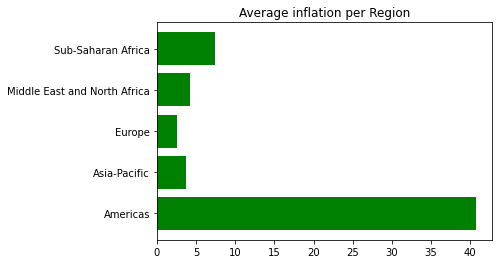

In [293]:
plt.barh(region_.index, region_['Inflation (%)'], color='g')
plt.title('Average inflation per Region')
plt.show()

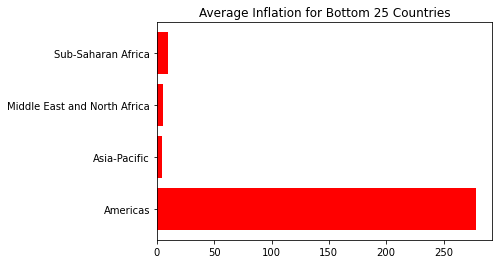

In [313]:
plt.barh(region_small.index, region_small['Inflation (%)'], color='r')
plt.title('Average Inflation for Bottom 25 Countries')
plt.show()

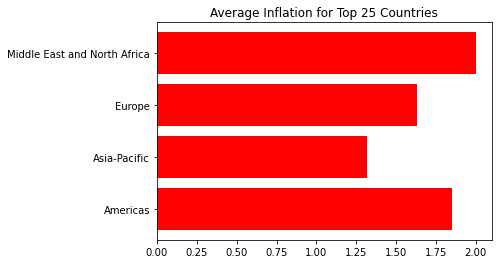

In [314]:
plt.barh(region_large.index, region_large['Inflation (%)'], color='r')
plt.title('Average Inflation for Top 25 Countries')
plt.show()

In [331]:
data.index[169]

181

In [332]:
no_ven = data.drop(data.index[169])

In [333]:
no_ven

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Financial Freedom tier,std5 plus one,std5 minus one,Trade Freedom tier,std6 plus one,std6 minus one,GDP Growth tier,std7 plus one,std7 minus one,Public Debt tier
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,bottom_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,bottom_tier
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,middle_tier,87.677559,80.968952,upper_tier,5.232914,1.674062,middle_tier,94.391742,27.324537,middle_tier
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,bottom_tier,85.857944,68.542056,bottom_tier,3.865344,-0.193915,middle_tier,100.353492,22.646508,middle_tier
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,middle_tier,76.498980,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,middle_tier,82.953877,63.766123,middle_tier,5.221690,-1.615023,middle_tier,85.763865,29.976135,middle_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,177,Uzbekistan,Uzbekistan,Asia-Pacific,140.0,36.0,53.3,49.8,34.3,25.2,...,bottom_tier,85.475669,65.939331,bottom_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,middle_tier
180,178,Vanuatu,Vanuatu,Asia-Pacific,116.0,26.0,56.4,65.9,36.4,51.9,...,middle_tier,85.475669,65.939331,bottom_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,middle_tier
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,middle_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,upper_tier,88.050871,7.494129,middle_tier
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,middle_tier,76.498980,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier


In [336]:
no_ven1 = no_ven.groupby('Region').mean()

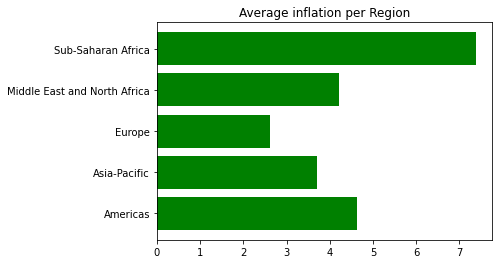

In [338]:
plt.barh(no_ven1.index, no_ven1['Inflation (%)'], color='g')
plt.title('Average inflation per Region')
plt.show()

In [353]:
no_ven1[no_ven1.columns[5:25]]

,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
Region,,,,,,,,,,,,,,,,,,,,
Americas,41.375862,38.510345,78.393103,73.513793,67.337931,64.524138,60.265517,75.851724,73.820690,64.482759,52.413793,6.020690,28.217241,26.482759,22.313793,28.741379,2.348276,2.417241,4.627586,58.662069
Asia-Pacific,47.927500,42.627500,83.130000,72.250000,70.930000,68.500000,65.890000,75.717500,75.707500,47.625000,44.250000,4.957500,24.397500,22.482500,17.245000,28.795000,4.502500,4.282500,3.707500,47.772500
Europe,56.662791,56.069767,71.627907,45.997674,84.809302,74.820930,61.048837,79.846512,84.323256,75.116279,63.255814,2.197674,31.506977,19.553488,34.020930,41.758140,3.453488,2.451163,2.604651,60.858140
Middle East and North Africa,51.685714,46.714286,87.721429,60.764286,48.578571,67.514286,57.164286,76.671429,77.200000,53.571429,52.857143,5.150000,18.035714,15.607143,13.371429,35.214286,1.835714,2.742857,4.221429,61.500000
Sub-Saharan Africa,36.426087,30.878261,75.247826,76.363043,52.693478,51.943478,55.482609,72.997826,66.154348,51.739130,39.782609,9.204348,32.891304,29.934783,17.652174,26.710870,3.497826,3.723913,7.378261,58.228261


In [354]:
region_[region_.columns[5:25]]

,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
Region,,,,,,,,,,,,,,,,,,,,
Americas,40.433333,37.490000,78.270000,73.000000,65.680000,63.503333,59.190000,73.323333,73.360000,62.333333,51.000000,6.153333,28.410000,26.733333,22.066667,29.030000,1.803333,2.076667,40.723333,57.870000
Asia-Pacific,47.927500,42.627500,83.130000,72.250000,70.930000,68.500000,65.890000,75.717500,75.707500,47.625000,44.250000,4.957500,24.397500,22.482500,17.245000,28.795000,4.502500,4.282500,3.707500,47.772500
Europe,56.662791,56.069767,71.627907,45.997674,84.809302,74.820930,61.048837,79.846512,84.323256,75.116279,63.255814,2.197674,31.506977,19.553488,34.020930,41.758140,3.453488,2.451163,2.604651,60.858140
Middle East and North Africa,51.685714,46.714286,87.721429,60.764286,48.578571,67.514286,57.164286,76.671429,77.200000,53.571429,52.857143,5.150000,18.035714,15.607143,13.371429,35.214286,1.835714,2.742857,4.221429,61.500000
Sub-Saharan Africa,36.426087,30.878261,75.247826,76.363043,52.693478,51.943478,55.482609,72.997826,66.154348,51.739130,39.782609,9.204348,32.891304,29.934783,17.652174,26.710870,3.497826,3.723913,7.378261,58.228261


<BarContainer object of 5 artists>

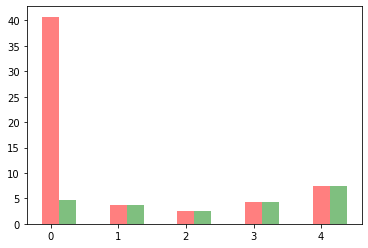

In [377]:
pos = list(range(len(region_['Inflation (%)'])))
width = 0.25
plt.bar(pos, region_['Inflation (%)'], width, alpha=0.5, color='red')
plt.bar([p + width for p in pos], no_ven1['Inflation (%)'], width, alpha=0.5, color='g')

In [ ]:
# compare worst country based on 2019 score for each region
# compare best country based on 2019 score for each region

In [416]:
from sklearn.cluster import KMeans

In [485]:
Country_Group = data.groupby('Country').mean()

In [570]:
Country_Group

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one,y_kmeans
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,0
Albania,2,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Algeria,3,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,38.902552,71.432797,34.281488,85.857944,68.542056,3.865344,-0.193915,100.353492,22.646508,0
Angola,4,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,27.214281,53.030523,26.534694,76.498980,55.809715,6.565108,0.430544,88.057856,28.398666,0
Argentina,5,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,178,116.0,26.0,56.4,65.9,36.4,51.9,97.3,54.1,15.3,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,0
Venezuela,179,179.0,32.0,25.9,7.6,13.1,7.9,74.7,58.1,17.6,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,2
Vietnam,180,128.0,30.0,55.3,49.8,40.3,34.0,79.7,74.1,40.7,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,0


In [483]:
region_.head()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one,y_kmeans
Region,,,,,,,,,,,,,,,,,,,,,
Americas,82.266667,87.833333,16.100000,60.526667,48.790000,40.433333,37.490000,78.270000,73.000000,65.680000,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,1
Asia-Pacific,104.600000,87.300000,20.600000,62.555000,56.015000,47.927500,42.627500,83.130000,72.250000,70.930000,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
Europe,89.418605,48.813953,22.418605,68.665116,70.330233,56.662791,56.069767,71.627907,45.997674,84.809302,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,2
Middle East and North Africa,95.785714,90.285714,7.500000,61.257143,54.442857,51.685714,46.714286,87.721429,60.764286,48.578571,...,38.902552,71.432797,34.281488,85.857944,68.542056,3.865344,-0.193915,100.353492,22.646508,1
Sub-Saharan Africa,88.173913,128.586957,24.391304,54.026087,38.597826,36.426087,30.878261,75.247826,76.363043,52.693478,...,27.214281,53.030523,26.534694,76.498980,55.809715,6.565108,0.430544,88.057856,28.398666,0


In [550]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(3,13):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(Country_Group)
    wcss.append(kmeans.inertia_)

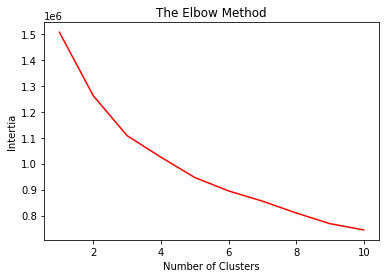

In [551]:
plt.plot(range(1,11), wcss, color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.show()

In [552]:
conda install -c conda-forge kneed

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [553]:
from kneed import KneeLocator

In [554]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")


kl.elbow

3

In [555]:
k_means = KMeans(
init="random",
n_clusters=3,
n_init=1,
max_iter=5,
random_state=42
)

In [556]:
y_kmeans = k_means.fit_predict(Country_Group)

In [557]:
Country_Group['y_kmeans'] = y_kmeans

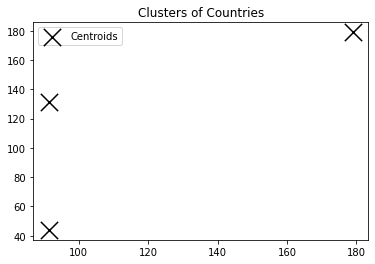

In [585]:
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'black', marker='x', label = 'Centroids')
plt.title('Clusters of Countries')
plt.legend()
plt.show()

In [559]:
cluster_results = Country_Group.groupby('y_kmeans').mean()

In [560]:
cluster_results

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 plus one,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one
y_kmeans,,,,,,,,,,,,,,,,,,,,,
0,91.250000,131.079545,26.159091,53.785227,39.602273,35.582955,30.070455,79.092045,73.065909,54.077273,...,61.510964,32.027935,60.758574,28.401196,80.833961,61.399445,6.130188,0.499114,88.693367,23.268085
1,91.488095,43.940476,13.857143,69.695238,68.733333,57.397619,55.489286,76.285714,58.730952,80.738095,...,76.381870,45.087141,71.972276,37.931774,85.742857,72.525480,5.502503,1.064339,91.888403,22.855076
2,179.000000,179.000000,32.000000,25.900000,7.600000,13.100000,7.900000,74.700000,58.100000,17.600000,...,66.585027,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135


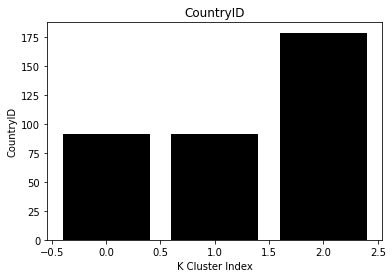

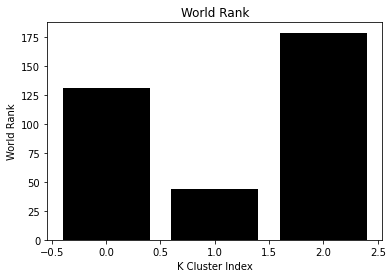

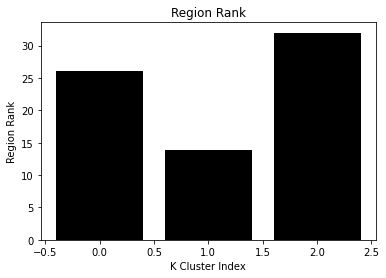

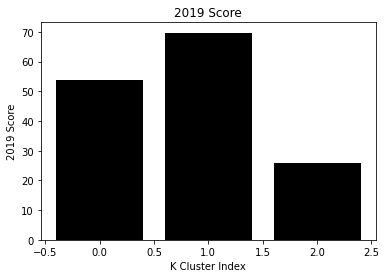

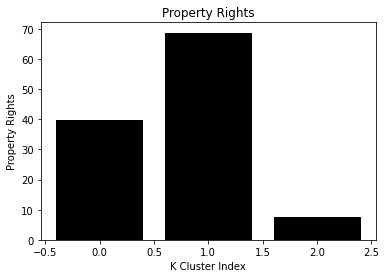

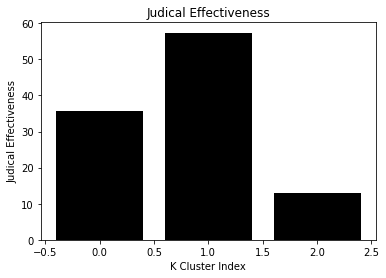

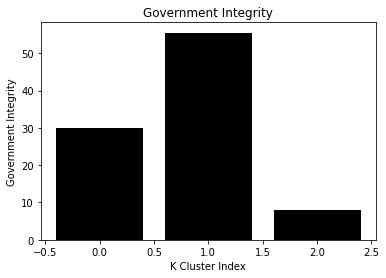

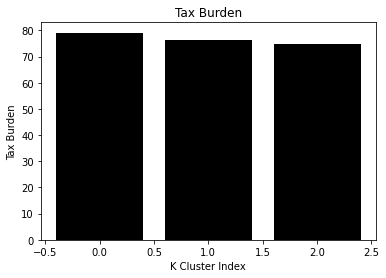

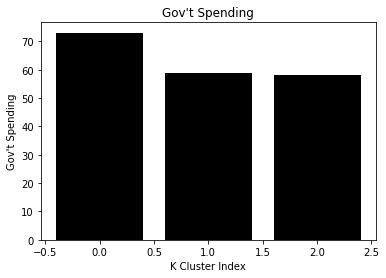

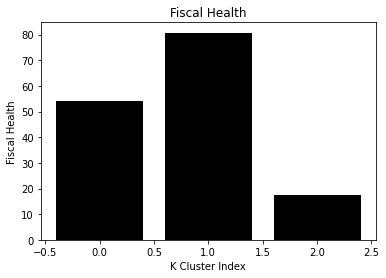

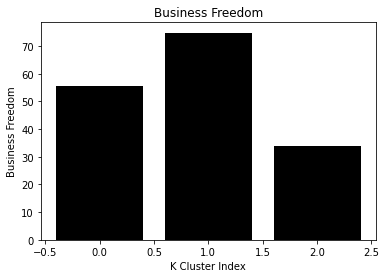

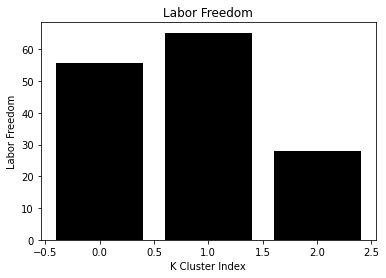

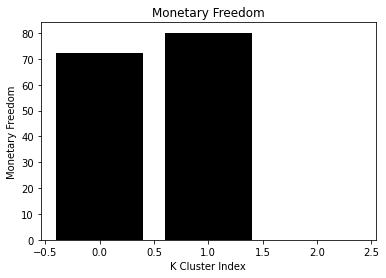

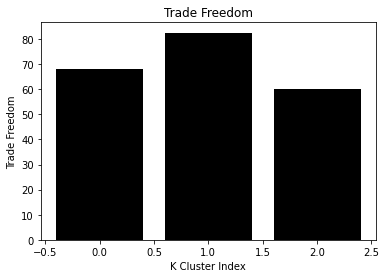

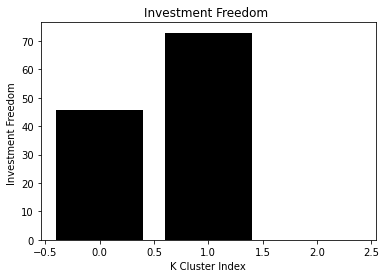

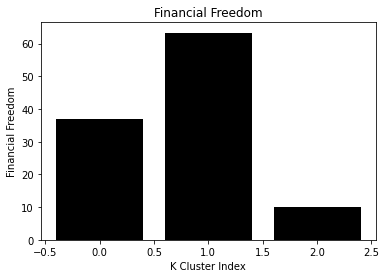

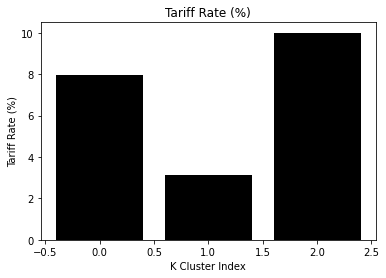

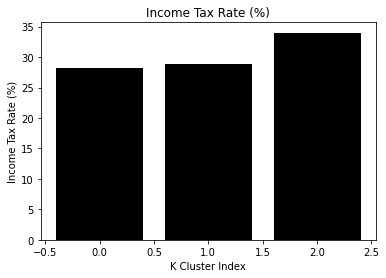

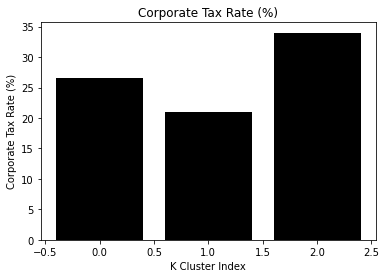

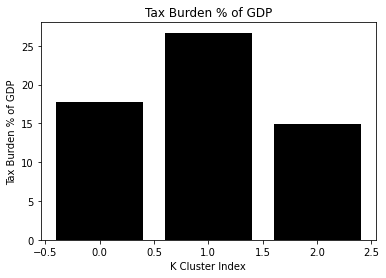

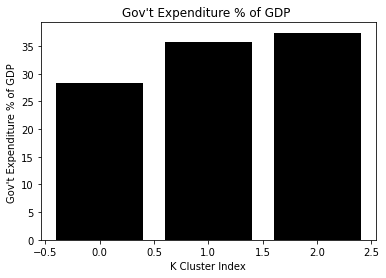

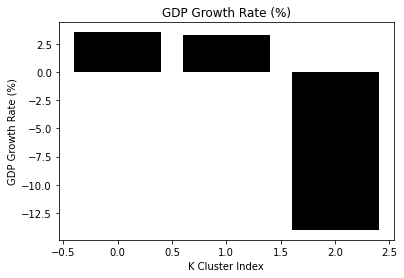

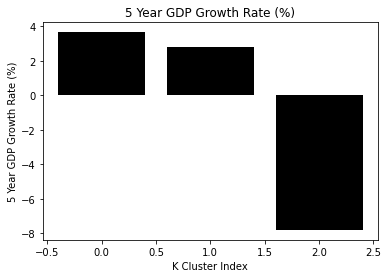

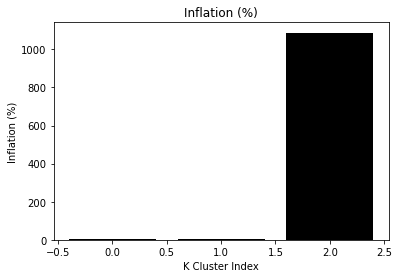

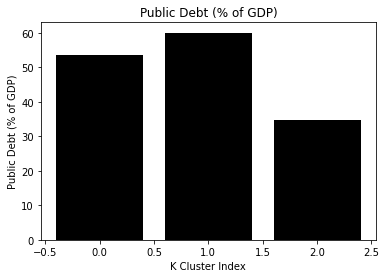

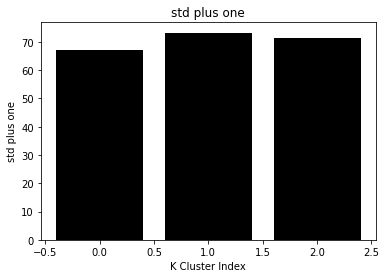

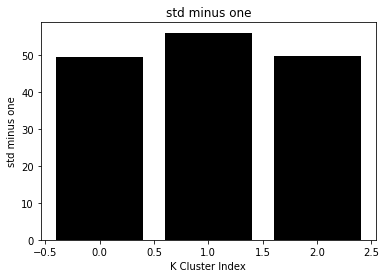

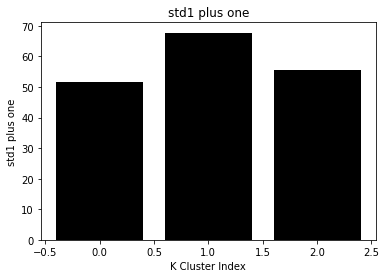

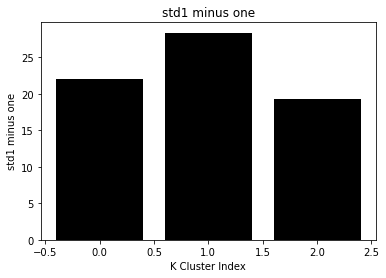

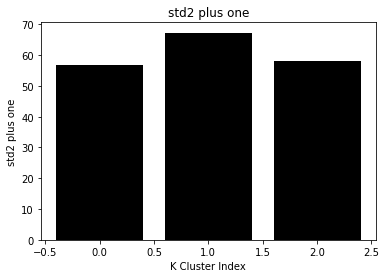

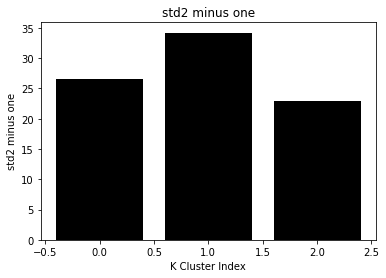

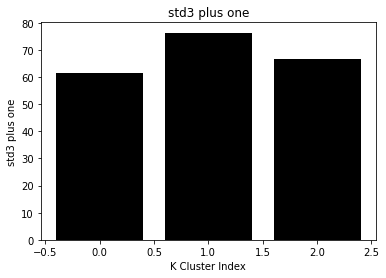

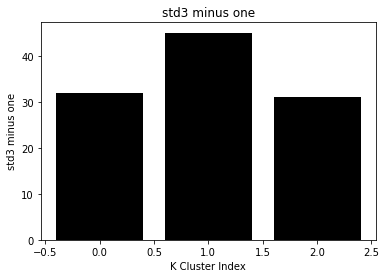

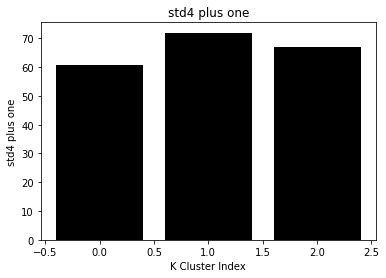

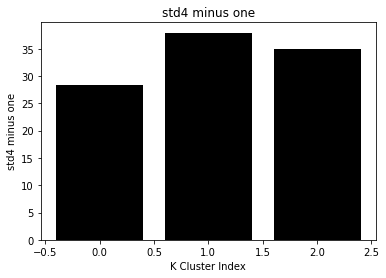

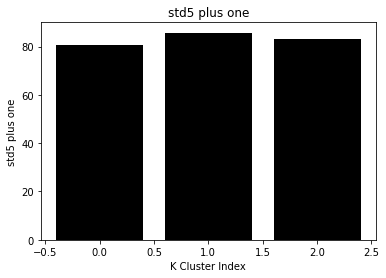

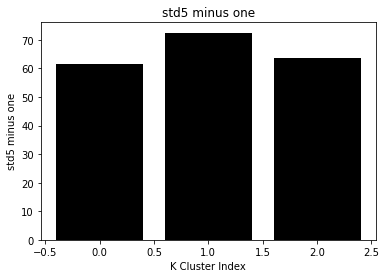

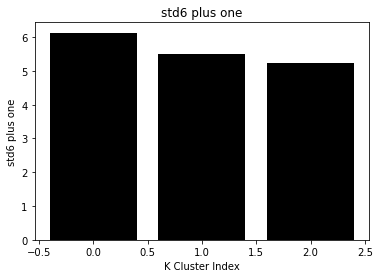

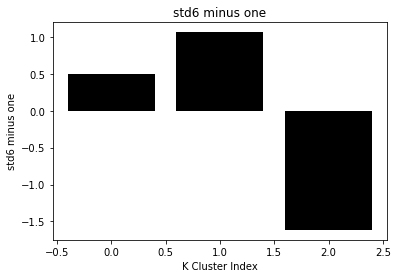

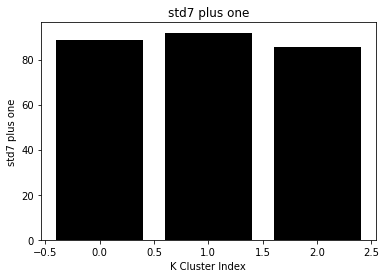

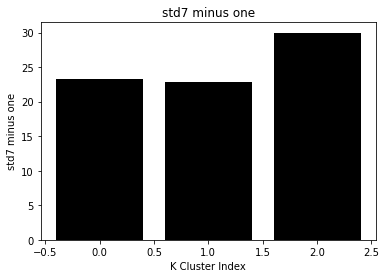

In [561]:
for col in cluster_results.columns:
    plt.bar(cluster_results.index,cluster_results[col], color='k')
    plt.title(col)
    plt.xlabel('K Cluster Index')
    plt.ylabel(col)
    plt.show()

In [562]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [563]:
cluster_1 = Country_Group[Country_Group['y_kmeans'] == 1]

In [564]:
cluster_1

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one,y_kmeans
Country,,,,,,,,,,,,,,,,,,,,,
Albania,2,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Armenia,6,47.0,24.0,67.7,57.2,46.3,38.6,84.7,79.0,53.0,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Australia,7,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
Austria,8,31.0,16.0,72.0,84.2,71.3,77.4,50.5,24.5,85.5,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Azerbaijan,9,60.0,13.0,65.4,59.1,53.1,44.7,87.5,59.5,89.4,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,169,68.0,33.0,64.6,55.8,49.8,41.2,76.4,65.1,92.2,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
United Arab Emirates,173,9.0,1.0,77.6,81.8,87.1,78.8,99.2,68.8,88.9,...,38.902552,71.432797,34.281488,85.857944,68.542056,3.865344,-0.193915,100.353492,22.646508,1
United Kingdom,174,7.0,3.0,78.9,92.3,85.9,83.8,64.7,48.2,68.6,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1


In [518]:
cluster_0 = Country_Group[Country_Group['y_kmeans'] == 0]

In [519]:
cluster_0

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one,y_kmeans
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,0
Algeria,3,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,38.902552,71.432797,34.281488,85.857944,68.542056,3.865344,-0.193915,100.353492,22.646508,0
Angola,4,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,27.214281,53.030523,26.534694,76.498980,55.809715,6.565108,0.430544,88.057856,28.398666,0
Argentina,5,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,0
Bahamas,10,76.0,15.0,62.9,42.2,46.9,43.7,97.3,86.8,65.7,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,177,140.0,36.0,53.3,49.8,34.3,25.2,91.3,67.4,98.7,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,0
Vanuatu,178,116.0,26.0,56.4,65.9,36.4,51.9,97.3,54.1,15.3,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,0
Vietnam,180,128.0,30.0,55.3,49.8,40.3,34.0,79.7,74.1,40.7,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,0


In [571]:
cluster_1.sort_values('2019 Score', ascending=False)[:25]

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one,y_kmeans
Country,,,,,,,,,,,,,,,,,,,,,
Hong Kong SAR,71,1.0,1.0,90.2,93.3,75.3,83.8,93.1,90.3,100.0,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
Singapore,147,2.0,2.0,89.4,97.4,92.4,95.1,90.4,90.7,80.0,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
New Zealand,120,3.0,3.0,84.4,95.0,83.5,96.7,71.0,50.4,98.6,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
Switzerland,158,4.0,1.0,81.9,85.3,82.0,88.0,70.5,64.8,96.3,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Australia,7,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
Ireland,78,6.0,2.0,80.5,85.8,68.4,78.0,76.3,77.4,89.0,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
United Kingdom,174,7.0,3.0,78.9,92.3,85.9,83.8,64.7,48.2,68.6,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Canada,29,8.0,1.0,77.7,87.0,69.4,84.6,76.8,51.3,83.1,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,1
United Arab Emirates,173,9.0,1.0,77.6,81.8,87.1,78.8,99.2,68.8,88.9,...,38.902552,71.432797,34.281488,85.857944,68.542056,3.865344,-0.193915,100.353492,22.646508,1


In [572]:
segmented_columns = Country_Group.columns[2:25]

In [573]:
segmented_columns

Index(['Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ',
       'GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [578]:
for seg in segmented_columns:
    print('Values:',seg, 'equals', data.iloc[data[seg].argmax()]['Country'])

Values: Region Rank equals Eritrea
Values: 2019 Score equals Hong Kong SAR
Values: Property Rights equals Singapore
Values: Judical Effectiveness equals Singapore
Values: Government Integrity equals New Zealand
Values: Tax Burden equals Saudi Arabia
Values: Gov't Spending equals Sudan
Values: Fiscal Health equals Hong Kong SAR
Values: Business Freedom equals Hong Kong SAR
Values: Labor Freedom equals Singapore
Values: Monetary Freedom equals Bulgaria
Values: Trade Freedom equals Hong Kong SAR
Values: Investment Freedom  equals Luxembourg
Values: Financial Freedom equals Australia
Values: Tariff Rate (%) equals Bahamas
Values: Income Tax Rate (%) equals Chad
Values: Corporate Tax Rate (%) equals Comoros
Values: Tax Burden % of GDP equals Lesotho
Values: Gov't Expenditure % of GDP  equals Timor-Leste
Values: GDP Growth Rate (%) equals Ethiopia
Values: 5 Year GDP Growth Rate (%) equals Ethiopia
Values: Inflation (%) equals Venezuela
Values: Public Debt (% of GDP) equals Japan


In [642]:
for seg in segmented_columns:
    print('Values:',seg, 'equals', data.iloc[data[seg].argmin()]['Country'])

Values: Region Rank equals Canada
Values: 2019 Score equals Venezuela
Values: Property Rights equals Venezuela
Values: Judical Effectiveness equals Bolivia
Values: Government Integrity equals Venezuela
Values: Tax Burden equals Denmark
Values: Gov't Spending equals Timor-Leste
Values: Fiscal Health equals Congo, Republic of
Values: Business Freedom equals Eritrea
Values: Labor Freedom equals Turkmenistan
Values: Monetary Freedom equals Venezuela
Values: Trade Freedom equals Sudan
Values: Investment Freedom  equals Eritrea
Values: Financial Freedom equals Afghanistan
Values: Tariff Rate (%) equals Hong Kong SAR
Values: Income Tax Rate (%) equals Bahamas
Values: Corporate Tax Rate (%) equals Bahamas
Values: Tax Burden % of GDP equals Kuwait
Values: Gov't Expenditure % of GDP  equals Sudan
Values: GDP Growth Rate (%) equals Venezuela
Values: 5 Year GDP Growth Rate (%) equals Venezuela
Values: Inflation (%) equals Chad
Values: Public Debt (% of GDP) equals Macau


In [580]:
for seg in segmented_columns:
    print('Values:',seg, 'equals', data.iloc[data[seg].argmax()]['Region'])

Values: Region Rank equals Sub-Saharan Africa
Values: 2019 Score equals Asia-Pacific
Values: Property Rights equals Asia-Pacific
Values: Judical Effectiveness equals Asia-Pacific
Values: Government Integrity equals Asia-Pacific
Values: Tax Burden equals Middle East and North Africa
Values: Gov't Spending equals Sub-Saharan Africa
Values: Fiscal Health equals Asia-Pacific
Values: Business Freedom equals Asia-Pacific
Values: Labor Freedom equals Asia-Pacific
Values: Monetary Freedom equals Europe
Values: Trade Freedom equals Asia-Pacific
Values: Investment Freedom  equals Europe
Values: Financial Freedom equals Asia-Pacific
Values: Tariff Rate (%) equals Americas
Values: Income Tax Rate (%) equals Sub-Saharan Africa
Values: Corporate Tax Rate (%) equals Sub-Saharan Africa
Values: Tax Burden % of GDP equals Sub-Saharan Africa
Values: Gov't Expenditure % of GDP  equals Asia-Pacific
Values: GDP Growth Rate (%) equals Sub-Saharan Africa
Values: 5 Year GDP Growth Rate (%) equals Sub-Saharan A

In [643]:
for seg in segmented_columns:
    print('Values:',seg, 'equals', data.iloc[data[seg].argmin()]['Region'])

Values: Region Rank equals Americas
Values: 2019 Score equals Americas
Values: Property Rights equals Americas
Values: Judical Effectiveness equals Americas
Values: Government Integrity equals Americas
Values: Tax Burden equals Europe
Values: Gov't Spending equals Asia-Pacific
Values: Fiscal Health equals Sub-Saharan Africa
Values: Business Freedom equals Sub-Saharan Africa
Values: Labor Freedom equals Asia-Pacific
Values: Monetary Freedom equals Americas
Values: Trade Freedom equals Sub-Saharan Africa
Values: Investment Freedom  equals Sub-Saharan Africa
Values: Financial Freedom equals Asia-Pacific
Values: Tariff Rate (%) equals Asia-Pacific
Values: Income Tax Rate (%) equals Americas
Values: Corporate Tax Rate (%) equals Americas
Values: Tax Burden % of GDP equals Middle East and North Africa
Values: Gov't Expenditure % of GDP  equals Sub-Saharan Africa
Values: GDP Growth Rate (%) equals Americas
Values: 5 Year GDP Growth Rate (%) equals Americas
Values: Inflation (%) equals Sub-Sah

In [586]:
data[data.Country == 'Japan']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Financial Freedom tier,std5 plus one,std5 minus one,Trade Freedom tier,std6 plus one,std6 minus one,GDP Growth tier,std7 plus one,std7 minus one,Public Debt tier
83,82,Japan,Japan,Asia-Pacific,30.0,8.0,72.1,84.1,68.5,78.0,...,middle_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,bottom_tier,88.050871,7.494129,upper_tier


In [587]:
minus_the_best = data.drop(83)

In [590]:
for col in minus_the_best.columns:
    print('feature:',col, '| top country:', minus_the_best.iloc[minus_the_best[seg].argmax()]['Country'])

feature: CountryID | top country: Greece
feature: Country Name | top country: Greece
feature: WEBNAME | top country: Greece
feature: Region | top country: Greece
feature: World Rank | top country: Greece
feature: Region Rank | top country: Greece
feature: 2019 Score | top country: Greece
feature: Property Rights | top country: Greece
feature: Judical Effectiveness | top country: Greece
feature: Government Integrity | top country: Greece
feature: Tax Burden | top country: Greece
feature: Gov't Spending | top country: Greece
feature: Fiscal Health | top country: Greece
feature: Business Freedom | top country: Greece
feature: Labor Freedom | top country: Greece
feature: Monetary Freedom | top country: Greece
feature: Trade Freedom | top country: Greece
feature: Investment Freedom  | top country: Greece
feature: Financial Freedom | top country: Greece
feature: Tariff Rate (%) | top country: Greece
feature: Income Tax Rate (%) | top country: Greece
feature: Corporate Tax Rate (%) | top coun

In [777]:
for col in data.columns:
    print('feature:',col, '| bottom country:', data.iloc[data[seg].argmin()]['Country'])

feature: CountryID | bottom country: Chad
feature: Country Name | bottom country: Chad
feature: WEBNAME | bottom country: Chad
feature: Region | bottom country: Chad
feature: World Rank | bottom country: Chad
feature: Region Rank | bottom country: Chad
feature: 2019 Score | bottom country: Chad
feature: Property Rights | bottom country: Chad
feature: Judical Effectiveness | bottom country: Chad
feature: Government Integrity | bottom country: Chad
feature: Tax Burden | bottom country: Chad
feature: Gov't Spending | bottom country: Chad
feature: Fiscal Health | bottom country: Chad
feature: Business Freedom | bottom country: Chad
feature: Labor Freedom | bottom country: Chad
feature: Monetary Freedom | bottom country: Chad
feature: Trade Freedom | bottom country: Chad
feature: Investment Freedom  | bottom country: Chad
feature: Financial Freedom | bottom country: Chad
feature: Tariff Rate (%) | bottom country: Chad
feature: Income Tax Rate (%) | bottom country: Chad
feature: Corporate Ta

In [731]:
data1 = data[['2019 Score','Country','Region','Business Freedom','Property Rights','Judical Effectiveness','Government Integrity', 'Labor Freedom','Trade Freedom','Investment Freedom ','Monetary Freedom','Financial Freedom','GDP Growth Rate (%)','5 Year GDP Growth Rate (%)']]

In [732]:
data1.reset_index()

,index,2019 Score,Country,Region,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,GDP Growth Rate (%),5 Year GDP Growth Rate (%)
0,0,51.5,Afghanistan,Asia-Pacific,49.2,19.6,29.6,25.2,60.4,66.0,10.0,76.7,10.0,2.5,2.9
1,1,66.5,Albania,Europe,69.3,54.8,30.6,40.4,52.7,87.8,70.0,81.5,70.0,3.9,2.5
2,2,46.2,Algeria,Middle East and North Africa,61.6,31.6,36.2,28.9,49.9,67.4,30.0,74.9,30.0,2.0,3.1
3,3,50.6,Angola,Sub-Saharan Africa,55.7,35.9,26.6,20.5,58.8,61.2,30.0,55.4,40.0,0.7,2.9
4,4,52.2,Argentina,Americas,56.4,47.8,44.5,33.5,46.9,70.0,55.0,60.2,60.0,2.9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,180,56.4,Vanuatu,Asia-Pacific,52.4,65.9,36.4,51.9,58.8,64.4,65.0,75.0,40.0,4.2,2.4
169,181,25.9,Venezuela,Americas,33.9,7.6,13.1,7.9,28.0,60.0,0.0,0.0,10.0,-14.0,-7.8
170,182,55.3,Vietnam,Asia-Pacific,63.5,49.8,40.3,34.0,62.8,79.2,30.0,68.9,40.0,6.8,6.2
171,184,53.6,Zambia,Sub-Saharan Africa,71.1,45.0,35.6,32.3,46.0,72.6,55.0,70.3,50.0,3.6,4.0


In [733]:
data1.describe()

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,GDP Growth Rate (%),5 Year GDP Growth Rate (%)
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,61.349133,64.722543,53.561850,46.045087,42.284393,60.051445,75.022543,58.583815,75.682659,49.653179,3.290751,3.171676
std,10.290731,14.770800,19.229243,17.651070,19.925058,13.778284,10.825901,21.408001,9.501612,18.921378,2.748959,2.467099
min,25.900000,17.700000,7.600000,12.300000,7.900000,20.000000,45.000000,0.000000,0.000000,10.000000,-14.000000,-7.800000
25%,54.600000,55.800000,37.400000,32.300000,28.100000,51.100000,67.400000,45.000000,72.400000,40.000000,2.000000,2.000000
50%,60.800000,65.800000,52.400000,44.000000,36.400000,60.100000,76.600000,60.000000,77.800000,50.000000,3.200000,3.100000
75%,68.100000,75.200000,66.000000,56.000000,50.500000,69.200000,84.700000,75.000000,81.800000,60.000000,4.800000,4.500000
max,90.200000,96.400000,97.400000,92.400000,96.700000,91.000000,95.000000,95.000000,88.000000,90.000000,10.900000,9.900000


In [734]:
data.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 plus one,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,91.872832,89.046243,20.219653,61.349133,53.561850,46.045087,42.284393,77.704046,66.019075,66.811561,...,68.760849,38.362850,66.239741,33.066617,83.229725,66.815362,5.820165,0.761338,90.227780,23.106324
std,53.867473,51.636567,12.623265,10.290731,19.229243,17.651070,19.925058,11.786874,20.957233,30.813333,...,12.783730,11.216974,9.301229,9.657266,4.337085,9.193345,0.894276,1.353193,4.303141,8.767652
min,1.000000,1.000000,1.000000,25.900000,7.600000,12.300000,7.900000,42.000000,0.900000,0.000000,...,49.981372,27.214281,53.030523,22.660888,76.498980,55.809715,3.865344,-1.615023,85.763865,7.494129
25%,45.000000,44.000000,9.000000,54.600000,37.400000,32.300000,28.100000,71.000000,54.100000,42.500000,...,49.981372,27.214281,53.030523,26.534694,76.498980,55.809715,5.221690,-0.193915,88.050871,22.646508
50%,92.000000,90.000000,19.000000,60.800000,52.400000,44.000000,36.400000,78.600000,70.000000,80.300000,...,69.983163,36.975762,67.049492,34.281488,85.475669,65.939331,5.232914,0.430544,88.057856,27.324537
75%,138.000000,133.000000,30.000000,68.100000,66.000000,56.000000,50.500000,85.400000,83.300000,90.100000,...,75.054238,38.902552,71.432797,34.950508,85.857944,68.542056,6.565108,1.674062,94.391742,28.398666
max,186.000000,179.000000,47.000000,90.200000,97.400000,92.400000,96.700000,99.800000,96.600000,100.000000,...,84.116260,56.544206,78.487506,48.024122,87.677559,80.968952,6.727819,2.277181,100.353492,29.976135


In [735]:
data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Financial Freedom tier,std5 plus one,std5 minus one,Trade Freedom tier,std6 plus one,std6 minus one,GDP Growth tier,std7 plus one,std7 minus one,Public Debt tier
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,bottom_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,bottom_tier
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,middle_tier,87.677559,80.968952,upper_tier,5.232914,1.674062,middle_tier,94.391742,27.324537,middle_tier
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,bottom_tier,85.857944,68.542056,bottom_tier,3.865344,-0.193915,middle_tier,100.353492,22.646508,middle_tier
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,middle_tier,76.498980,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,middle_tier,82.953877,63.766123,middle_tier,5.221690,-1.615023,middle_tier,85.763865,29.976135,middle_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,178,Vanuatu,Vanuatu,Asia-Pacific,116.0,26.0,56.4,65.9,36.4,51.9,...,middle_tier,85.475669,65.939331,bottom_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,middle_tier
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,bottom_tier,82.953877,63.766123,bottom_tier,5.221690,-1.615023,bottom_tier,85.763865,29.976135,middle_tier
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,middle_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,upper_tier,88.050871,7.494129,middle_tier
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,middle_tier,76.498980,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier


In [736]:
seg_columns = Country_Group.iloc[:, np.r_[3:7,10:16,21:23]]

In [737]:
seg_columns

,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,GDP Growth Rate (%),5 Year GDP Growth Rate (%)
Country,,,,,,,,,,,,
Afghanistan,51.5,19.6,29.6,25.2,49.2,60.4,76.7,66.0,10.0,10.0,2.5,2.9
Albania,66.5,54.8,30.6,40.4,69.3,52.7,81.5,87.8,70.0,70.0,3.9,2.5
Algeria,46.2,31.6,36.2,28.9,61.6,49.9,74.9,67.4,30.0,30.0,2.0,3.1
Angola,50.6,35.9,26.6,20.5,55.7,58.8,55.4,61.2,30.0,40.0,0.7,2.9
Argentina,52.2,47.8,44.5,33.5,56.4,46.9,60.2,70.0,55.0,60.0,2.9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,56.4,65.9,36.4,51.9,52.4,58.8,75.0,64.4,65.0,40.0,4.2,2.4
Venezuela,25.9,7.6,13.1,7.9,33.9,28.0,0.0,60.0,0.0,10.0,-14.0,-7.8
Vietnam,55.3,49.8,40.3,34.0,63.5,62.8,68.9,79.2,30.0,40.0,6.8,6.2


In [738]:
for seg in seg_columns:
    print('Values:',seg, 'equals', data1.iloc[data1[seg].argmax()]['Country'])

Values: 2019 Score equals Hong Kong SAR
Values: Property Rights equals Singapore
Values: Judical Effectiveness equals Singapore
Values: Government Integrity equals New Zealand
Values: Business Freedom equals Hong Kong SAR
Values: Labor Freedom equals Singapore
Values: Monetary Freedom equals Bulgaria
Values: Trade Freedom equals Hong Kong SAR
Values: Investment Freedom  equals Luxembourg
Values: Financial Freedom equals Australia
Values: GDP Growth Rate (%) equals Ethiopia
Values: 5 Year GDP Growth Rate (%) equals Ethiopia


In [739]:
for seg in seg_columns:
    print('Values:',seg, 'equals', data1.iloc[data1[seg].argmin()]['Country'])

Values: 2019 Score equals Venezuela
Values: Property Rights equals Venezuela
Values: Judical Effectiveness equals Bolivia
Values: Government Integrity equals Venezuela
Values: Business Freedom equals Eritrea
Values: Labor Freedom equals Turkmenistan
Values: Monetary Freedom equals Venezuela
Values: Trade Freedom equals Sudan
Values: Investment Freedom  equals Eritrea
Values: Financial Freedom equals Afghanistan
Values: GDP Growth Rate (%) equals Venezuela
Values: 5 Year GDP Growth Rate (%) equals Venezuela


In [740]:
for col in seg_columns:
    print('feature:',col, '| Top Country:', data1.iloc[data1[seg].argmax()]['Country'])

feature: 2019 Score | Top Country: Ethiopia
feature: Property Rights | Top Country: Ethiopia
feature: Judical Effectiveness | Top Country: Ethiopia
feature: Government Integrity | Top Country: Ethiopia
feature: Business Freedom | Top Country: Ethiopia
feature: Labor Freedom | Top Country: Ethiopia
feature: Monetary Freedom | Top Country: Ethiopia
feature: Trade Freedom | Top Country: Ethiopia
feature: Investment Freedom  | Top Country: Ethiopia
feature: Financial Freedom | Top Country: Ethiopia
feature: GDP Growth Rate (%) | Top Country: Ethiopia
feature: 5 Year GDP Growth Rate (%) | Top Country: Ethiopia


In [741]:
for col in seg_columns:
    print('feature:',col, '| Bottom Country:', data1.iloc[data1[seg].argmin()]['Country'])

feature: 2019 Score | Bottom Country: Venezuela
feature: Property Rights | Bottom Country: Venezuela
feature: Judical Effectiveness | Bottom Country: Venezuela
feature: Government Integrity | Bottom Country: Venezuela
feature: Business Freedom | Bottom Country: Venezuela
feature: Labor Freedom | Bottom Country: Venezuela
feature: Monetary Freedom | Bottom Country: Venezuela
feature: Trade Freedom | Bottom Country: Venezuela
feature: Investment Freedom  | Bottom Country: Venezuela
feature: Financial Freedom | Bottom Country: Venezuela
feature: GDP Growth Rate (%) | Bottom Country: Venezuela
feature: 5 Year GDP Growth Rate (%) | Bottom Country: Venezuela


In [742]:
data1[data1.Country == 'Ethiopia']

,2019 Score,Country,Region,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,GDP Growth Rate (%),5 Year GDP Growth Rate (%)
56,53.6,Ethiopia,Sub-Saharan Africa,48.6,32.6,40.9,35.1,58.0,60.8,35.0,60.8,20.0,10.9,9.9


In [744]:
data.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'std plus one', 'std minus one', '2019 tier',
       'std1 plus one', 'std1 minus one', 'Gov Integrity tier',
       'std2 plus one', 'std2 minus one', 'Judical Effectiveness tier',
       'std3 plus one', 'std3 minus one', 'Property Rights tier',
 

In [760]:
data2 = data[['Country','Region','Region Rank','World Rank','Inflation (%)','Unemployment (%)']]

In [767]:
data2.reset_index()

,index,Country,Region,Region Rank,World Rank,Inflation (%),Unemployment (%)
0,0,Afghanistan,Asia-Pacific,39.0,152.0,5.0,8.8
1,1,Albania,Europe,27.0,52.0,2.0,13.9
2,2,Algeria,Middle East and North Africa,14.0,171.0,5.6,10
3,3,Angola,Sub-Saharan Africa,33.0,156.0,31.7,8.2
4,4,Argentina,Americas,26.0,148.0,25.7,8.7
...,...,...,...,...,...,...,...
168,180,Vanuatu,Asia-Pacific,26.0,116.0,3.1,5.2
169,181,Venezuela,Americas,32.0,179.0,1087.5,7.7
170,182,Vietnam,Asia-Pacific,30.0,128.0,3.5,2.1
171,184,Zambia,Sub-Saharan Africa,27.0,138.0,6.6,7.8


In [762]:
Country_Group.columns

Index(['CountryID', 'World Rank', 'Region Rank', '2019 Score',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Gov't Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom ', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'Inflation (%)', 'Public Debt (% of GDP)',
       'std plus one', 'std minus one', 'std1 plus one', 'std1 minus one',
       'std2 plus one', 'std2 minus one', 'std3 plus one', 'std3 minus one',
       'std4 plus one', 'std4 minus one', 'std5 plus one', 'std5 minus one',
       'std6 plus one', 'std6 minus one', 'std7 plus one', 'std7 minus one',
       'y_kmeans'],
      dtype='object')

In [773]:
seg1_columns = Country_Group.iloc[:, np.r_[1:3,23]]

In [774]:
seg1_columns

,World Rank,Region Rank,Inflation (%)
Country,,,
Afghanistan,152.0,39.0,5.0
Albania,52.0,27.0,2.0
Algeria,171.0,14.0,5.6
Angola,156.0,33.0,31.7
Argentina,148.0,26.0,25.7
...,...,...,...
Vanuatu,116.0,26.0,3.1
Venezuela,179.0,32.0,1087.5
Vietnam,128.0,30.0,3.5


In [775]:
for seg in seg1_columns:
    print('Values:',seg, 'equals', data2.iloc[data2[seg].argmax()]['Country'])

Values: World Rank equals Venezuela
Values: Region Rank equals Eritrea
Values: Inflation (%) equals Venezuela


In [776]:
for seg in seg1_columns:
    print('Values:',seg, 'equals', data2.iloc[data2[seg].argmin()]['Country'])

Values: World Rank equals Hong Kong SAR
Values: Region Rank equals Canada
Values: Inflation (%) equals Chad


In [779]:
data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Financial Freedom tier,std5 plus one,std5 minus one,Trade Freedom tier,std6 plus one,std6 minus one,GDP Growth tier,std7 plus one,std7 minus one,Public Debt tier
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,bottom_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,bottom_tier
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,middle_tier,87.677559,80.968952,upper_tier,5.232914,1.674062,middle_tier,94.391742,27.324537,middle_tier
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,bottom_tier,85.857944,68.542056,bottom_tier,3.865344,-0.193915,middle_tier,100.353492,22.646508,middle_tier
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,middle_tier,76.498980,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,middle_tier,82.953877,63.766123,middle_tier,5.221690,-1.615023,middle_tier,85.763865,29.976135,middle_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,178,Vanuatu,Vanuatu,Asia-Pacific,116.0,26.0,56.4,65.9,36.4,51.9,...,middle_tier,85.475669,65.939331,bottom_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,middle_tier
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,bottom_tier,82.953877,63.766123,bottom_tier,5.221690,-1.615023,bottom_tier,85.763865,29.976135,middle_tier
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,middle_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,upper_tier,88.050871,7.494129,middle_tier
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,middle_tier,76.498980,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier


In [784]:
for seg in seg_columns:
    print('Values:',seg, 'equals', data1.iloc[data1[seg].argmax()]['Region'])

Values: 2019 Score equals Asia-Pacific
Values: Property Rights equals Asia-Pacific
Values: Judical Effectiveness equals Asia-Pacific
Values: Government Integrity equals Asia-Pacific
Values: Business Freedom equals Asia-Pacific
Values: Labor Freedom equals Asia-Pacific
Values: Monetary Freedom equals Europe
Values: Trade Freedom equals Asia-Pacific
Values: Investment Freedom  equals Europe
Values: Financial Freedom equals Asia-Pacific
Values: GDP Growth Rate (%) equals Sub-Saharan Africa
Values: 5 Year GDP Growth Rate (%) equals Sub-Saharan Africa


In [785]:
for seg in seg_columns:
    print('Values:',seg, 'equals', data1.iloc[data1[seg].argmin()]['Region'])

Values: 2019 Score equals Americas
Values: Property Rights equals Americas
Values: Judical Effectiveness equals Americas
Values: Government Integrity equals Americas
Values: Business Freedom equals Sub-Saharan Africa
Values: Labor Freedom equals Asia-Pacific
Values: Monetary Freedom equals Americas
Values: Trade Freedom equals Sub-Saharan Africa
Values: Investment Freedom  equals Sub-Saharan Africa
Values: Financial Freedom equals Asia-Pacific
Values: GDP Growth Rate (%) equals Americas
Values: 5 Year GDP Growth Rate (%) equals Americas


In [801]:
data[data.Country == 'Ethiopia']['FDI Inflow (Millions)']

56    3,586.40
Name: FDI Inflow (Millions), dtype: object

In [810]:
cluster_1.head()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one,y_kmeans
Country,,,,,,,,,,,,,,,,,,,,,
Albania,2,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Armenia,6,47.0,24.0,67.7,57.2,46.3,38.6,84.7,79.0,53.0,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Australia,7,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
Austria,8,31.0,16.0,72.0,84.2,71.3,77.4,50.5,24.5,85.5,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Azerbaijan,9,60.0,13.0,65.4,59.1,53.1,44.7,87.5,59.5,89.4,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1


In [813]:
data3 = data[['2019 Score','Country','Region','Business Freedom','Property Rights','Judical Effectiveness','Government Integrity', 'Labor Freedom','Trade Freedom','Investment Freedom ','Monetary Freedom','Financial Freedom','Tax Burden',"Gov't Spending",'Fiscal Health']]

In [814]:
seg3_columns = Country_Group.iloc[:, np.r_[3:15]]

In [815]:
seg3_columns

,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom
Country,,,,,,,,,,,,
Afghanistan,51.5,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0
Albania,66.5,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0
Algeria,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0
Angola,50.6,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0
Argentina,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,56.4,65.9,36.4,51.9,97.3,54.1,15.3,52.4,58.8,75.0,64.4,65.0
Venezuela,25.9,7.6,13.1,7.9,74.7,58.1,17.6,33.9,28.0,0.0,60.0,0.0
Vietnam,55.3,49.8,40.3,34.0,79.7,74.1,40.7,63.5,62.8,68.9,79.2,30.0


In [816]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmax()]['Country'])

Values: 2019 Score equals Hong Kong SAR
Values: Property Rights equals Singapore
Values: Judical Effectiveness equals Singapore
Values: Government Integrity equals New Zealand
Values: Tax Burden equals Saudi Arabia
Values: Gov't Spending equals Sudan
Values: Fiscal Health equals Hong Kong SAR
Values: Business Freedom equals Hong Kong SAR
Values: Labor Freedom equals Singapore
Values: Monetary Freedom equals Bulgaria
Values: Trade Freedom equals Hong Kong SAR
Values: Investment Freedom  equals Luxembourg


In [817]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmin()]['Country'])

Values: 2019 Score equals Venezuela
Values: Property Rights equals Venezuela
Values: Judical Effectiveness equals Bolivia
Values: Government Integrity equals Venezuela
Values: Tax Burden equals Denmark
Values: Gov't Spending equals Timor-Leste
Values: Fiscal Health equals Congo, Republic of
Values: Business Freedom equals Eritrea
Values: Labor Freedom equals Turkmenistan
Values: Monetary Freedom equals Venezuela
Values: Trade Freedom equals Sudan
Values: Investment Freedom  equals Eritrea


In [818]:
for col in data3.columns:
    print('feature:',col, '| bottom country:', data3.iloc[data3[seg].argmin()]['Country'])

feature: 2019 Score | bottom country: Eritrea
feature: Country | bottom country: Eritrea
feature: Region | bottom country: Eritrea
feature: Business Freedom | bottom country: Eritrea
feature: Property Rights | bottom country: Eritrea
feature: Judical Effectiveness | bottom country: Eritrea
feature: Government Integrity | bottom country: Eritrea
feature: Labor Freedom | bottom country: Eritrea
feature: Trade Freedom | bottom country: Eritrea
feature: Investment Freedom  | bottom country: Eritrea
feature: Monetary Freedom | bottom country: Eritrea
feature: Financial Freedom | bottom country: Eritrea
feature: Tax Burden | bottom country: Eritrea
feature: Gov't Spending | bottom country: Eritrea
feature: Fiscal Health | bottom country: Eritrea


In [820]:
for col in data3.columns:
    print('feature:',col, '| top country:', data3.iloc[data3[seg].argmax()]['Country'])

feature: 2019 Score | top country: Luxembourg
feature: Country | top country: Luxembourg
feature: Region | top country: Luxembourg
feature: Business Freedom | top country: Luxembourg
feature: Property Rights | top country: Luxembourg
feature: Judical Effectiveness | top country: Luxembourg
feature: Government Integrity | top country: Luxembourg
feature: Labor Freedom | top country: Luxembourg
feature: Trade Freedom | top country: Luxembourg
feature: Investment Freedom  | top country: Luxembourg
feature: Monetary Freedom | top country: Luxembourg
feature: Financial Freedom | top country: Luxembourg
feature: Tax Burden | top country: Luxembourg
feature: Gov't Spending | top country: Luxembourg
feature: Fiscal Health | top country: Luxembourg


In [823]:
data3[data3.Country == 'Eritrea']

,2019 Score,Country,Region,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health
53,38.9,Eritrea,Sub-Saharan Africa,17.7,35.5,18.1,19.7,70.0,69.2,0.0,61.0,20.0,81.4,73.9,0.0


In [860]:
x = data3[['Property Rights','Judical Effectiveness','Government Integrity']]
y = data3[['2019 Score']]

In [861]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=42)

In [862]:
linear_model = LinearRegression()

In [863]:
linear_model.fit(x_train,y_train)

LinearRegression()

LinearRegression()

In [828]:
y_pred = linear_model.predict(x_test)

In [830]:
len(y_pred)

139

In [856]:
y_pred

array([[54.88157811],
       [65.76870755],
       [55.94657564],
       [67.35962545],
       [49.5483719 ],
       [58.96657473],
       [62.71138612],
       [55.45489292],
       [83.6978566 ],
       [61.19068386],
       [56.70354498],
       [62.75333462],
       [65.61091018],
       [51.4553034 ],
       [47.93314879],
       [58.49397706],
       [53.50393888],
       [81.47774066],
       [58.44258536],
       [59.76641179],
       [77.90022176],
       [50.01451221],
       [49.56982311],
       [78.32033633],
       [60.31954559],
       [52.1319591 ],
       [60.88602862],
       [54.75760594],
       [53.1912443 ],
       [68.13034843],
       [59.1397139 ],
       [45.8273668 ],
       [64.0348283 ],
       [84.84184855],
       [54.07798151],
       [50.23354345],
       [58.55217385],
       [56.22058823],
       [49.86972703],
       [69.78379708],
       [52.61877249],
       [55.35482051],
       [52.36883357],
       [53.06805736],
       [40.82716295],
       [75

In [832]:
r2 = linear_model.score(x,y)

In [833]:
r2

0.7745741033598701

In [853]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# data helpers
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
from sklearn import linear_model

In [865]:
print('Coefficients: \n', linear_model.coef_)

Coefficients: 
 [[0.23162514 0.09792813 0.17716797]]


In [867]:
x1 = data3[['Tax Burden',"Gov't Spending",'Fiscal Health']]
y1 = data3[['2019 Score']]

In [869]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.8, random_state=42)

In [873]:
linear_model01 = LinearRegression()

In [874]:
linear_model01.fit(x1_train,y1_train)

LinearRegression()

In [875]:
y_pred1 = linear_model01.predict(x1_test)

In [876]:
second_r2 = linear_model01.score(x1,y1)

In [878]:
second_r2

0.2753177527134202

In [879]:
x2 = data3[['Business Freedom','Labor Freedom','Monetary Freedom']]
y2 = data3[['2019 Score']]

In [880]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.8, random_state=42)

In [881]:
linear_model02 = LinearRegression()

In [882]:
linear_model02.fit(x2_train,y2_train)

LinearRegression()

In [883]:
y_pred2 = linear_model02.predict(x2_test)

In [884]:
third_r2 = linear_model02.score(x2,y2)

In [885]:
third_r2

0.6866792492198395

In [887]:
x3 = data3[['Trade Freedom','Investment Freedom ','Financial Freedom']]
y3 = data3[['2019 Score']]

In [888]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.8, random_state=42)

In [889]:
linear_model03 = LinearRegression()

In [890]:
linear_model03.fit(x3_train,y3_train)

LinearRegression()

In [891]:
y_pred3 = linear_model03.predict(x3_test)

In [892]:
fourth_r2 = linear_model03.score(x3,y3)

In [893]:
fourth_r2

0.6982837563226505

In [895]:
data3.corr()

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health
2019 Score,1.000000,0.779681,0.876601,0.805825,0.818174,0.512976,0.718299,0.734504,0.589085,0.794123,-0.075163,-0.140741,0.559395
Business Freedom,0.779681,1.000000,0.795173,0.702661,0.735066,0.444069,0.619128,0.516247,0.399591,0.597350,-0.084588,-0.368192,0.288709
Property Rights,0.876601,0.795173,1.000000,0.826805,0.866998,0.432746,0.714819,0.655495,0.508726,0.733347,-0.223515,-0.409670,0.329969
Judical Effectiveness,0.805825,0.702661,0.826805,1.000000,0.888880,0.421694,0.565308,0.510584,0.409702,0.594981,-0.245655,-0.290839,0.287380
Government Integrity,0.818174,0.735066,0.866998,0.888880,1.000000,0.413794,0.583844,0.580177,0.431507,0.640491,-0.286403,-0.400868,0.292240
Labor Freedom,0.512976,0.444069,0.432746,0.421694,0.413794,1.000000,0.303343,0.226250,0.247021,0.279099,0.111771,-0.062048,0.104431
Trade Freedom,0.718299,0.619128,0.714819,0.565308,0.583844,0.303343,1.000000,0.576351,0.382336,0.639587,-0.052765,-0.334891,0.284658
Investment Freedom,0.734504,0.516247,0.655495,0.510584,0.580177,0.226250,0.576351,1.000000,0.577414,0.810443,-0.273529,-0.284966,0.244706
Monetary Freedom,0.589085,0.399591,0.508726,0.409702,0.431507,0.247021,0.382336,0.577414,1.000000,0.512113,-0.152641,-0.176064,0.248407
Financial Freedom,0.794123,0.597350,0.733347,0.594981,0.640491,0.279099,0.639587,0.810443,0.512113,1.000000,-0.180520,-0.274348,0.254980


<AxesSubplot:>

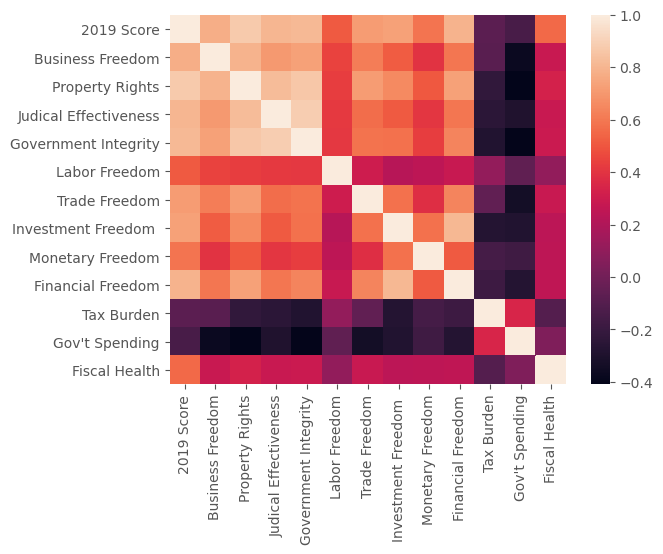

In [896]:
sns.heatmap(data3.corr())

In [897]:
4

In [904]:
seg4_columns = Country_Group.iloc[:, np.r_[3:7]]

In [905]:
seg4_columns

,2019 Score,Property Rights,Judical Effectiveness,Government Integrity
Country,,,,
Afghanistan,51.5,19.6,29.6,25.2
Albania,66.5,54.8,30.6,40.4
Algeria,46.2,31.6,36.2,28.9
Angola,50.6,35.9,26.6,20.5
Argentina,52.2,47.8,44.5,33.5
...,...,...,...,...
Vanuatu,56.4,65.9,36.4,51.9
Venezuela,25.9,7.6,13.1,7.9
Vietnam,55.3,49.8,40.3,34.0


In [906]:
for seg in seg4_columns:
    print('Values:',seg, 'equals', data4.iloc[data4[seg].argmax()]['Country'])

Values: 2019 Score equals Hong Kong SAR
Values: Property Rights equals Singapore
Values: Judical Effectiveness equals Singapore
Values: Government Integrity equals New Zealand


In [910]:
for seg in seg4_columns:
    print('Values:',seg, 'equals', data4.iloc[data4[seg].argmin()]['Country'])

Values: 2019 Score equals Venezuela
Values: Property Rights equals Venezuela
Values: Judical Effectiveness equals Bolivia
Values: Government Integrity equals Venezuela


In [908]:
for col in data4.columns:
    print('feature:',col, '| top country:', data4.iloc[data4[seg].argmax()]['Country'])

feature: 2019 Score | top country: New Zealand
feature: Country | top country: New Zealand
feature: Region | top country: New Zealand
feature: Property Rights | top country: New Zealand
feature: Judical Effectiveness | top country: New Zealand
feature: Government Integrity | top country: New Zealand


In [912]:
for col in data4.columns:
    print('feature:',col, '| bottom country:', data4.iloc[data4[seg].argmin()]['Country'])

feature: 2019 Score | bottom country: Venezuela
feature: Country | bottom country: Venezuela
feature: Region | bottom country: Venezuela
feature: Property Rights | bottom country: Venezuela
feature: Judical Effectiveness | bottom country: Venezuela
feature: Government Integrity | bottom country: Venezuela


In [914]:
data[data.Country == 'New Zealand']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Financial Freedom tier,std5 plus one,std5 minus one,Trade Freedom tier,std6 plus one,std6 minus one,GDP Growth tier,std7 plus one,std7 minus one,Public Debt tier
122,120,New Zealand,NewZealand,Asia-Pacific,3.0,3.0,84.4,95.0,83.5,96.7,...,upper_tier,85.475669,65.939331,upper_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,middle_tier


In [929]:
data5 = data[['Country','Region', '2019 tier', 'Property Rights tier','Gov Integrity tier','Judical Effectiveness tier']]

In [930]:
data5

,Country,Region,2019 tier,Property Rights tier,Gov Integrity tier,Judical Effectiveness tier
0,Afghanistan,Asia-Pacific,bottom_tier,bottom_tier,middle_tier,middle_tier
1,Albania,Europe,middle_tier,bottom_tier,middle_tier,bottom_tier
2,Algeria,Middle East and North Africa,bottom_tier,bottom_tier,middle_tier,bottom_tier
3,Angola,Sub-Saharan Africa,middle_tier,middle_tier,bottom_tier,middle_tier
4,Argentina,Americas,middle_tier,middle_tier,middle_tier,middle_tier
...,...,...,...,...,...,...
180,Vanuatu,Asia-Pacific,middle_tier,middle_tier,middle_tier,middle_tier
181,Venezuela,Americas,bottom_tier,bottom_tier,bottom_tier,bottom_tier
182,Vietnam,Asia-Pacific,middle_tier,middle_tier,middle_tier,middle_tier
184,Zambia,Sub-Saharan Africa,middle_tier,middle_tier,middle_tier,middle_tier


In [936]:
data5.groupby('Property Rights tier').count()['Region']['bottom_tier']

26

In [938]:
data5.groupby('Property Rights tier').count()['Region']['middle_tier']

117

In [939]:
data5.groupby('Property Rights tier').count()['Region']['upper_tier']

30

In [940]:
data5.groupby('Judical Effectiveness tier').count()['Region']['bottom_tier']

24

In [941]:
data5.groupby('Judical Effectiveness tier').count()['Region']['middle_tier']

119

In [942]:
data5.groupby('Judical Effectiveness tier').count()['Region']['upper_tier']

30

In [943]:
data5.groupby('Gov Integrity tier').count()['Region']['bottom_tier']

13

In [944]:
data5.groupby('Gov Integrity tier').count()['Region']['middle_tier']

130

In [945]:
data5.groupby('Gov Integrity tier').count()['Region']['upper_tier']

30

In [959]:
data5[(data5['Property Rights tier'] == "bottom_tier")]['Region']

0                      Asia-Pacific
1                            Europe
2      Middle East and North Africa
11                     Asia-Pacific
13                           Europe
18                         Americas
19                           Europe
25                     Asia-Pacific
26               Sub-Saharan Africa
31               Sub-Saharan Africa
32               Sub-Saharan Africa
37               Sub-Saharan Africa
50     Middle East and North Africa
65                           Europe
70                         Americas
77     Middle East and North Africa
97               Sub-Saharan Africa
114                          Europe
116                          Europe
138                          Europe
146                          Europe
166                    Asia-Pacific
171                          Europe
172                    Asia-Pacific
174                          Europe
181                        Americas
Name: Region, dtype: object

In [960]:
region_propB = data5[(data5['Property Rights tier'] == "bottom_tier")]['Region']

In [961]:
region_propB.value_counts()

Europe                          10
Asia-Pacific                     5
Sub-Saharan Africa               5
Middle East and North Africa     3
Americas                         3
Name: Region, dtype: int64

In [962]:
region_propU = data5[(data5['Property Rights tier'] == "upper_tier")]['Region']

In [964]:
region_propU.value_counts()

Europe                          10
Asia-Pacific                     8
Sub-Saharan Africa               6
Americas                         4
Middle East and North Africa     2
Name: Region, dtype: int64

In [965]:
region_propM = data5[(data5['Property Rights tier'] == "middle_tier")]['Region']

In [966]:
region_propM.value_counts()

Sub-Saharan Africa              35
Asia-Pacific                    27
Americas                        23
Europe                          23
Middle East and North Africa     9
Name: Region, dtype: int64

In [967]:
region_JudB = data5[(data5['Judical Effectiveness tier'] == "bottom_tier")]['Region']

In [968]:
region_JudB.value_counts()

Asia-Pacific                    6
Americas                        6
Europe                          5
Sub-Saharan Africa              5
Middle East and North Africa    2
Name: Region, dtype: int64

In [969]:
region_JudM = data5[(data5['Judical Effectiveness tier'] == "middle_tier")]['Region']

In [970]:
region_JudM.value_counts()

Sub-Saharan Africa              37
Europe                          28
Asia-Pacific                    26
Americas                        18
Middle East and North Africa    10
Name: Region, dtype: int64

In [971]:
region_JudU = data5[(data5['Judical Effectiveness tier'] == "upper_tier")]['Region']

In [972]:
region_JudU.value_counts()

Europe                          10
Asia-Pacific                     8
Americas                         6
Sub-Saharan Africa               4
Middle East and North Africa     2
Name: Region, dtype: int64

In [974]:
region_IntB = data5[(data5['Gov Integrity tier'] == "bottom_tier")]['Region']

In [975]:
region_IntB.value_counts()

Sub-Saharan Africa              6
Europe                          3
Asia-Pacific                    2
Middle East and North Africa    1
Americas                        1
Name: Region, dtype: int64

In [976]:
region_IntM = data5[(data5['Gov Integrity tier'] == "middle_tier")]['Region']

In [977]:
region_IntM.value_counts()

Sub-Saharan Africa              35
Asia-Pacific                    32
Europe                          28
Americas                        25
Middle East and North Africa    10
Name: Region, dtype: int64

In [978]:
region_IntU = data5[(data5['Gov Integrity tier'] == "upper_tier")]['Region']

In [980]:
region_IntU.value_counts()

Europe                          12
Asia-Pacific                     6
Sub-Saharan Africa               5
Americas                         4
Middle East and North Africa     3
Name: Region, dtype: int64

In [993]:
data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Financial Freedom tier,std5 plus one,std5 minus one,Trade Freedom tier,std6 plus one,std6 minus one,GDP Growth tier,std7 plus one,std7 minus one,Public Debt tier
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,bottom_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,bottom_tier
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,middle_tier,87.677559,80.968952,upper_tier,5.232914,1.674062,middle_tier,94.391742,27.324537,middle_tier
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,bottom_tier,85.857944,68.542056,bottom_tier,3.865344,-0.193915,middle_tier,100.353492,22.646508,middle_tier
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,middle_tier,76.498980,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,middle_tier,82.953877,63.766123,middle_tier,5.221690,-1.615023,middle_tier,85.763865,29.976135,middle_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,178,Vanuatu,Vanuatu,Asia-Pacific,116.0,26.0,56.4,65.9,36.4,51.9,...,middle_tier,85.475669,65.939331,bottom_tier,6.727819,2.277181,middle_tier,88.050871,7.494129,middle_tier
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,bottom_tier,82.953877,63.766123,bottom_tier,5.221690,-1.615023,bottom_tier,85.763865,29.976135,middle_tier
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,middle_tier,85.475669,65.939331,middle_tier,6.727819,2.277181,upper_tier,88.050871,7.494129,middle_tier
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,middle_tier,76.498980,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier


In [996]:
data3 = data[['2019 Score','Country','Region','Business Freedom','Property Rights','Judical Effectiveness','Government Integrity', 'Labor Freedom','Trade Freedom','Investment Freedom ','Monetary Freedom','Financial Freedom','Tax Burden',"Gov't Spending",'Fiscal Health']]
seg3_columns = Country_Group.iloc[:, np.r_[3:16]]

In [997]:
seg3_columns

,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
Country,,,,,,,,,,,,,
Afghanistan,51.5,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0
Albania,66.5,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0
Algeria,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0
Angola,50.6,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0
Argentina,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,56.4,65.9,36.4,51.9,97.3,54.1,15.3,52.4,58.8,75.0,64.4,65.0,40.0
Venezuela,25.9,7.6,13.1,7.9,74.7,58.1,17.6,33.9,28.0,0.0,60.0,0.0,10.0
Vietnam,55.3,49.8,40.3,34.0,79.7,74.1,40.7,63.5,62.8,68.9,79.2,30.0,40.0


In [998]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmax()]['Country'])

Values: 2019 Score equals Hong Kong SAR
Values: Property Rights equals Singapore
Values: Judical Effectiveness equals Singapore
Values: Government Integrity equals New Zealand
Values: Tax Burden equals Saudi Arabia
Values: Gov't Spending equals Sudan
Values: Fiscal Health equals Hong Kong SAR
Values: Business Freedom equals Hong Kong SAR
Values: Labor Freedom equals Singapore
Values: Monetary Freedom equals Bulgaria
Values: Trade Freedom equals Hong Kong SAR
Values: Investment Freedom  equals Luxembourg
Values: Financial Freedom equals Australia


In [1077]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmax()]['Region'])

Values: 2019 Score equals Asia-Pacific
Values: Property Rights equals Asia-Pacific
Values: Judical Effectiveness equals Asia-Pacific
Values: Government Integrity equals Asia-Pacific
Values: Tax Burden equals Middle East and North Africa
Values: Gov't Spending equals Sub-Saharan Africa
Values: Fiscal Health equals Asia-Pacific
Values: Business Freedom equals Asia-Pacific
Values: Labor Freedom equals Asia-Pacific
Values: Monetary Freedom equals Europe
Values: Trade Freedom equals Asia-Pacific
Values: Investment Freedom  equals Europe
Values: Financial Freedom equals Asia-Pacific


In [1079]:
for seg in seg3_columns:
    print('Values:',col, 'equals', data3.iloc[data3[seg].argmax()]['Region'])

Values: Fiscal Health equals Asia-Pacific
Values: Fiscal Health equals Asia-Pacific
Values: Fiscal Health equals Asia-Pacific
Values: Fiscal Health equals Asia-Pacific
Values: Fiscal Health equals Middle East and North Africa
Values: Fiscal Health equals Sub-Saharan Africa
Values: Fiscal Health equals Asia-Pacific
Values: Fiscal Health equals Asia-Pacific
Values: Fiscal Health equals Asia-Pacific
Values: Fiscal Health equals Europe
Values: Fiscal Health equals Asia-Pacific
Values: Fiscal Health equals Europe
Values: Fiscal Health equals Asia-Pacific


In [1078]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmin()]['Region'])

Values: 2019 Score equals Americas
Values: Property Rights equals Americas
Values: Judical Effectiveness equals Americas
Values: Government Integrity equals Americas
Values: Tax Burden equals Europe
Values: Gov't Spending equals Asia-Pacific
Values: Fiscal Health equals Sub-Saharan Africa
Values: Business Freedom equals Sub-Saharan Africa
Values: Labor Freedom equals Asia-Pacific
Values: Monetary Freedom equals Americas
Values: Trade Freedom equals Sub-Saharan Africa
Values: Investment Freedom  equals Sub-Saharan Africa
Values: Financial Freedom equals Asia-Pacific


In [1001]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmin()]['Country'])

Values: 2019 Score equals Venezuela
Values: Property Rights equals Venezuela
Values: Judical Effectiveness equals Bolivia
Values: Government Integrity equals Venezuela
Values: Tax Burden equals Denmark
Values: Gov't Spending equals Timor-Leste
Values: Fiscal Health equals Congo, Republic of
Values: Business Freedom equals Eritrea
Values: Labor Freedom equals Turkmenistan
Values: Monetary Freedom equals Venezuela
Values: Trade Freedom equals Sudan
Values: Investment Freedom  equals Eritrea
Values: Financial Freedom equals Afghanistan


In [1000]:
for col in data3.columns:
    print('feature:',col, '| top country:', data3.iloc[data3[seg].argmax()]['Country'])

feature: 2019 Score | top country: Australia
feature: Country | top country: Australia
feature: Region | top country: Australia
feature: Business Freedom | top country: Australia
feature: Property Rights | top country: Australia
feature: Judical Effectiveness | top country: Australia
feature: Government Integrity | top country: Australia
feature: Labor Freedom | top country: Australia
feature: Trade Freedom | top country: Australia
feature: Investment Freedom  | top country: Australia
feature: Monetary Freedom | top country: Australia
feature: Financial Freedom | top country: Australia
feature: Tax Burden | top country: Australia
feature: Gov't Spending | top country: Australia
feature: Fiscal Health | top country: Australia


In [999]:
for col in data3.columns:
    print('feature:',col, '| bottom country:', data3.iloc[data3[seg].argmin()]['Country'])

feature: 2019 Score | bottom country: Afghanistan
feature: Country | bottom country: Afghanistan
feature: Region | bottom country: Afghanistan
feature: Business Freedom | bottom country: Afghanistan
feature: Property Rights | bottom country: Afghanistan
feature: Judical Effectiveness | bottom country: Afghanistan
feature: Government Integrity | bottom country: Afghanistan
feature: Labor Freedom | bottom country: Afghanistan
feature: Trade Freedom | bottom country: Afghanistan
feature: Investment Freedom  | bottom country: Afghanistan
feature: Monetary Freedom | bottom country: Afghanistan
feature: Financial Freedom | bottom country: Afghanistan
feature: Tax Burden | bottom country: Afghanistan
feature: Gov't Spending | bottom country: Afghanistan
feature: Fiscal Health | bottom country: Afghanistan


In [1006]:
Final_data = data3.groupby('Country').mean()

In [1007]:
Final_data

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health
Country,,,,,,,,,,,,,
Afghanistan,51.5,49.2,19.6,29.6,25.2,60.4,66.0,10.0,76.7,10.0,91.7,80.3,99.3
Albania,66.5,69.3,54.8,30.6,40.4,52.7,87.8,70.0,81.5,70.0,86.3,73.9,80.6
Algeria,46.2,61.6,31.6,36.2,28.9,49.9,67.4,30.0,74.9,30.0,76.4,48.7,18.7
Angola,50.6,55.7,35.9,26.6,20.5,58.8,61.2,30.0,55.4,40.0,83.9,80.7,58.2
Argentina,52.2,56.4,47.8,44.5,33.5,46.9,70.0,55.0,60.2,60.0,69.3,49.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,56.4,52.4,65.9,36.4,51.9,58.8,64.4,65.0,75.0,40.0,97.3,54.1,15.3
Venezuela,25.9,33.9,7.6,13.1,7.9,28.0,60.0,0.0,0.0,10.0,74.7,58.1,17.6
Vietnam,55.3,63.5,49.8,40.3,34.0,62.8,79.2,30.0,68.9,40.0,79.7,74.1,40.7


In [1008]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(3,13):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(Final_data)
    wcss.append(kmeans.inertia_)

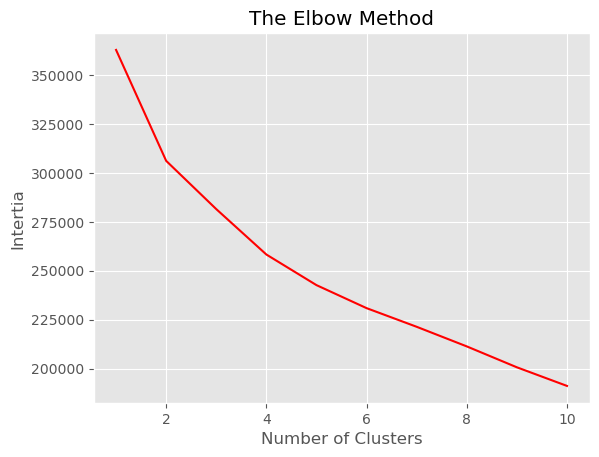

In [1009]:
plt.plot(range(1,11), wcss, color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.show()

In [1010]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")


kl.elbow

4

In [1011]:
k_means = KMeans(
init="random",
n_clusters=4,
n_init=1,
max_iter=5,
random_state=42
)

In [1012]:
y_kmeans = k_means.fit_predict(Final_data)

In [1013]:
Final_data['y_kmeans'] = y_kmeans

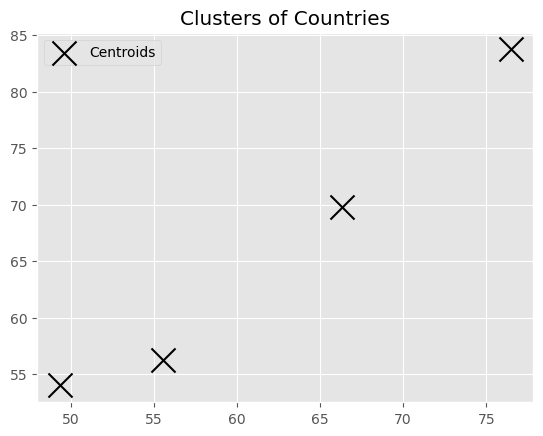

In [1014]:
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'black', marker='x', label = 'Centroids')
plt.title('Clusters of Countries')
plt.legend()
plt.show()

In [1015]:
cluster_results = Final_data.groupby('y_kmeans').mean()

In [1016]:
cluster_results

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health
y_kmeans,,,,,,,,,,,,,
0,55.581633,55.044898,38.869388,36.004082,30.134694,57.155102,66.608163,40.918367,72.342857,32.448980,79.163265,78.144898,80.095918
1,66.676786,69.626786,60.021429,48.069643,42.507143,61.200000,80.539286,70.625000,78.826786,59.285714,79.921429,66.112500,83.369643
2,51.604762,57.702381,42.473810,36.638095,32.095238,57.042857,70.364286,49.285714,71.233333,41.666667,79.940476,63.169048,17.559524
3,76.484615,83.738462,85.250000,75.803846,81.161538,67.896154,86.523077,80.961538,82.392308,74.230769,66.565385,47.569231,85.673077


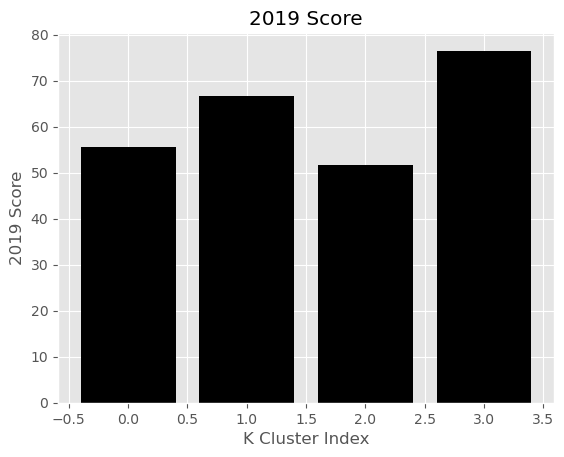

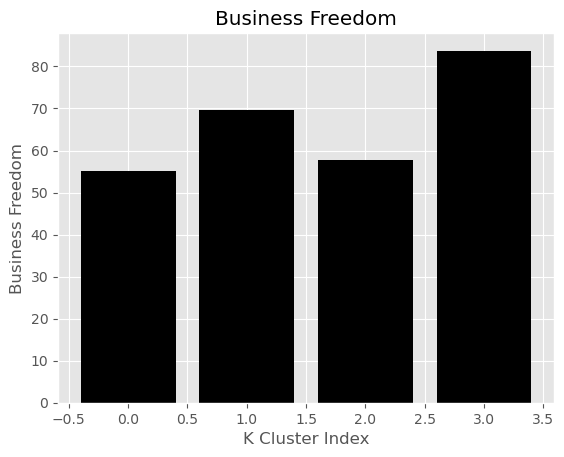

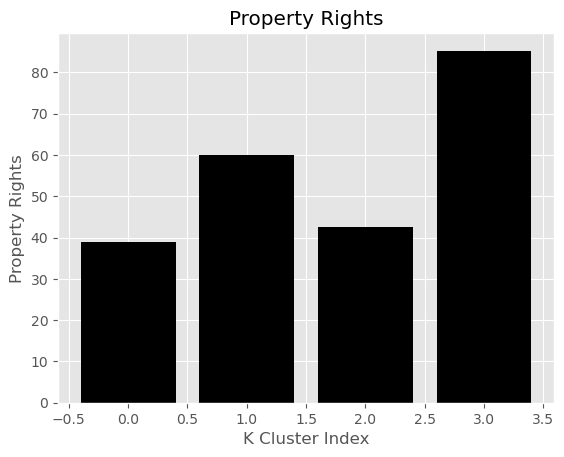

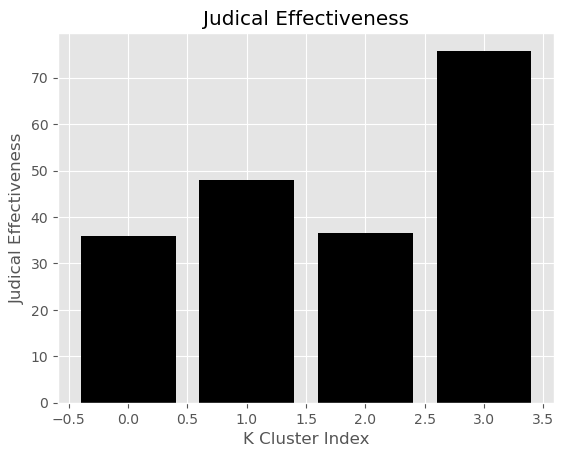

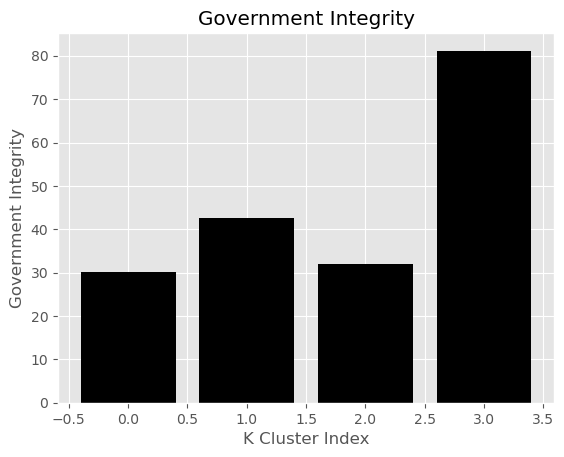

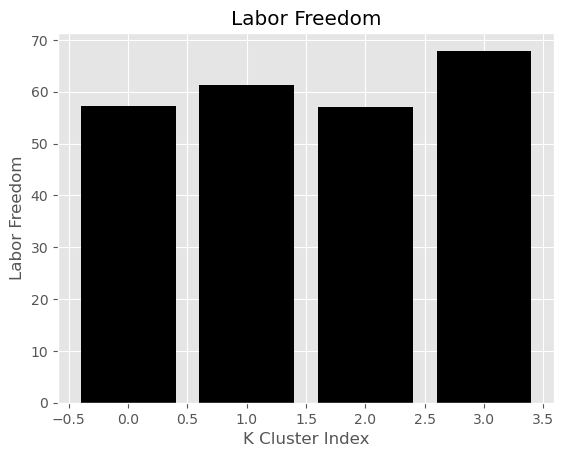

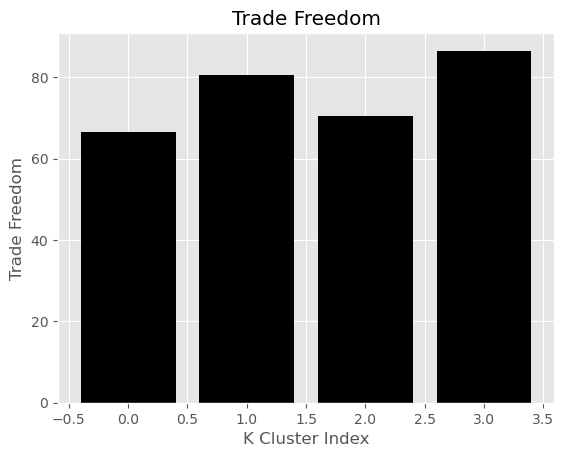

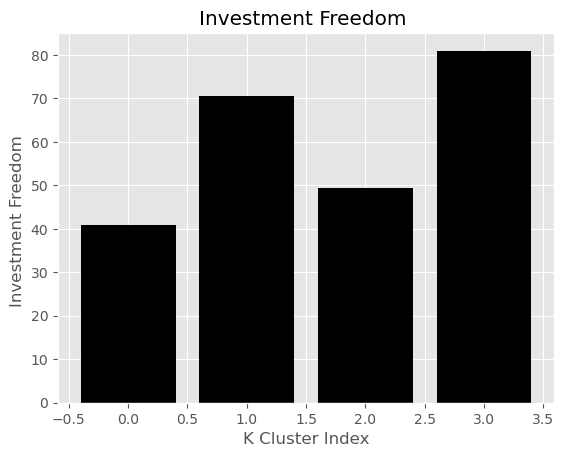

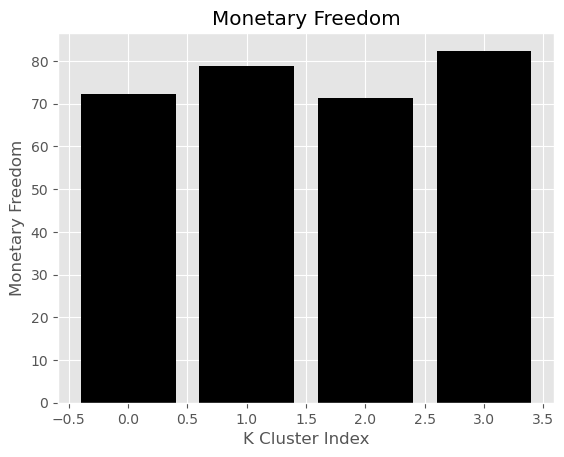

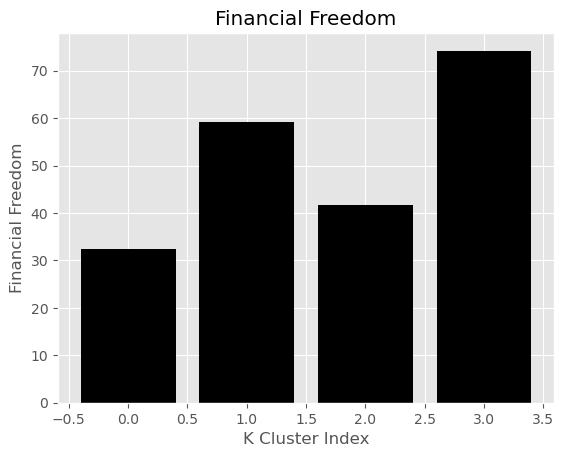

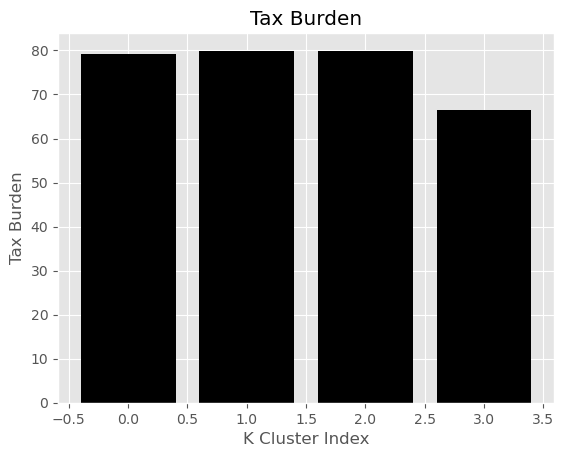

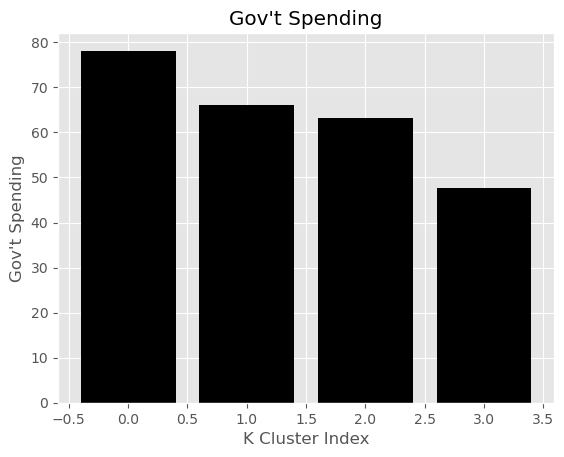

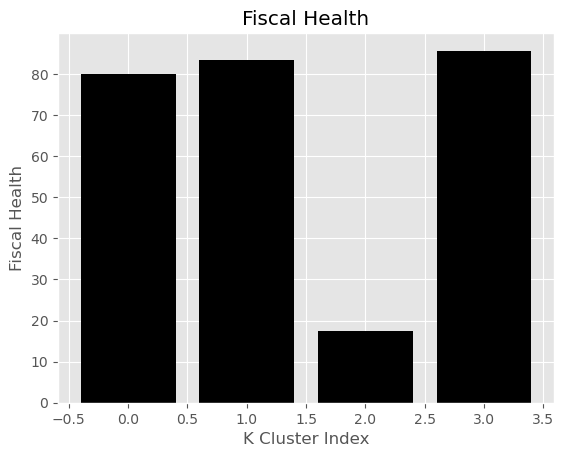

In [1017]:
for col in cluster_results.columns:
    plt.bar(cluster_results.index,cluster_results[col], color='k')
    plt.title(col)
    plt.xlabel('K Cluster Index')
    plt.ylabel(col)
    plt.show()

In [1018]:
cluster_3 = Final_data[Final_data['y_kmeans'] == 3]

In [1019]:
cluster_3

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health,y_kmeans
Country,,,,,,,,,,,,,,
Australia,80.9,88.3,79.1,86.5,79.9,84.1,87.6,80.0,86.6,90.0,62.8,60.1,86.2,3
Austria,72.0,74.9,84.2,71.3,77.4,68.7,86.0,90.0,81.5,70.0,50.5,24.5,85.5,3
Belgium,67.3,78.1,81.3,61.6,72.5,61.0,86.0,85.0,76.1,70.0,47.1,15.2,73.4,3
Canada,77.7,81.9,87.0,69.4,84.6,73.7,86.8,80.0,77.2,80.0,76.8,51.3,83.1,3
Denmark,76.7,90.7,86.2,77.8,85.8,86.4,86.0,90.0,84.1,80.0,42.0,14.4,96.7,3
Estonia,76.6,75.3,81.5,76.0,73.1,57.2,86.0,90.0,79.6,70.0,79.9,51.1,99.8,3
Finland,74.9,89.4,89.6,81.2,92.5,50.3,86.0,85.0,84.8,80.0,66.8,7.2,86.4,3
France,63.8,81.2,82.5,66.1,67.9,45.2,81.0,75.0,79.1,70.0,48.4,3.9,64.9,3
Germany,73.5,83.3,79.9,75.4,81.3,52.8,86.0,80.0,77.9,70.0,60.8,42.3,91.8,3


In [1020]:
cluster_3.describe()

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health,y_kmeans
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,76.484615,83.738462,85.250000,75.803846,81.161538,67.896154,86.523077,80.961538,82.392308,74.230769,66.565385,47.569231,85.673077,3.0
std,6.135777,7.191944,5.608797,8.118102,9.121758,15.005985,3.309176,11.577498,3.648882,9.454344,14.801079,24.406012,13.615684,0.0
min,63.800000,68.800000,71.500000,61.600000,59.500000,44.300000,80.000000,40.000000,75.400000,60.000000,42.000000,3.900000,53.100000,3.0
25%,73.125000,79.750000,81.575000,69.575000,77.400000,54.725000,86.000000,76.250000,79.925000,70.000000,58.025000,28.925000,80.775000,3.0
50%,76.750000,83.200000,85.350000,75.350000,82.550000,66.900000,86.000000,85.000000,82.800000,75.000000,66.100000,49.300000,88.950000,3.0
75%,78.600000,89.400000,87.850000,81.800000,87.450000,80.575000,86.950000,90.000000,85.275000,80.000000,75.075000,59.350000,96.675000,3.0
max,90.200000,96.400000,97.400000,92.400000,96.700000,91.000000,95.000000,95.000000,87.500000,90.000000,99.200000,90.700000,100.000000,3.0


In [1021]:
cluster_2 = Final_data[Final_data['y_kmeans'] == 2]

In [1022]:
cluster_2

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health,y_kmeans
Country,,,,,,,,,,,,,,
Algeria,46.2,61.6,31.6,36.2,28.9,49.9,67.4,30.0,74.9,30.0,76.4,48.7,18.7,2
Argentina,52.2,56.4,47.8,44.5,33.5,46.9,70.0,55.0,60.2,60.0,69.3,49.5,33.0,2
Bahrain,66.4,71.4,63.5,50.7,53.6,71.1,83.8,75.0,81.6,80.0,99.7,62.7,3.7,2
Belize,55.4,61.8,41.7,46.9,27.2,54.8,64.0,55.0,78.7,50.0,79.9,65.9,39.1,2
Benin,55.3,62.4,37.2,32.8,28.1,53.8,61.8,70.0,86.4,50.0,69.3,83.4,27.9,2
Bolivia,42.3,58.8,20.5,12.3,19.7,52.9,70.4,15.0,68.8,40.0,82.4,49.3,17.6,2
Brazil,51.9,57.9,57.3,51.7,28.1,51.9,69.0,50.0,75.5,50.0,70.5,55.2,5.9,2
Brunei Darussalam,65.1,80.2,64.0,56.0,43.7,90.8,84.0,65.0,76.5,50.0,90.7,59.9,20.0,2
Burundi,48.9,50.3,20.6,31.0,26.2,67.5,68.2,50.0,62.2,30.0,74.0,83.3,23.3,2


In [1023]:
cluster_2.describe()

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health,y_kmeans
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.0
mean,51.604762,57.702381,42.473810,36.638095,32.095238,57.042857,70.364286,49.285714,71.233333,41.666667,79.940476,63.169048,17.559524,2.0
std,7.630777,13.483386,12.660926,13.350454,10.476477,14.220959,9.042766,18.231955,13.320929,14.299355,10.130780,17.764166,10.544981,0.0
min,25.900000,17.700000,7.600000,12.300000,7.900000,28.000000,48.800000,0.000000,0.000000,10.000000,59.500000,0.900000,0.000000,2.0
25%,47.650000,50.900000,35.500000,27.350000,26.450000,47.225000,64.450000,40.000000,66.925000,30.000000,74.075000,55.275000,12.525000,2.0
50%,52.450000,57.500000,41.700000,36.400000,30.950000,58.050000,69.700000,50.000000,74.050000,40.000000,79.100000,66.400000,17.600000,2.0
75%,55.400000,65.975000,51.675000,46.300000,35.500000,67.475000,75.950000,63.750000,78.025000,50.000000,85.275000,75.600000,23.275000,2.0
max,66.400000,80.200000,65.900000,62.700000,53.800000,90.800000,87.600000,80.000000,86.400000,80.000000,99.800000,88.300000,40.700000,2.0


In [1076]:
data[data.Country == 'Zimbabwe']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Financial Freedom tier,std5 plus one,std5 minus one,Trade Freedom tier,std6 plus one,std6 minus one,GDP Growth tier,std7 plus one,std7 minus one,Public Debt tier
185,183,Zimbabwe,Zimbabwe,Sub-Saharan Africa,175.0,45.0,40.4,29.7,24.8,15.8,...,bottom_tier,76.49898,55.809715,middle_tier,6.565108,0.430544,middle_tier,88.057856,28.398666,middle_tier


In [1080]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmax()]['Country'])

Values: 2019 Score equals Hong Kong SAR
Values: Property Rights equals Singapore
Values: Judical Effectiveness equals Singapore
Values: Government Integrity equals New Zealand
Values: Tax Burden equals Saudi Arabia
Values: Gov't Spending equals Sudan
Values: Fiscal Health equals Hong Kong SAR
Values: Business Freedom equals Hong Kong SAR
Values: Labor Freedom equals Singapore
Values: Monetary Freedom equals Bulgaria
Values: Trade Freedom equals Hong Kong SAR
Values: Investment Freedom  equals Luxembourg
Values: Financial Freedom equals Australia


In [1081]:
for col in data3.columns:
    print('feature:',col, '| top country:', data3.iloc[data3[seg].argmax()]['Country'])

feature: 2019 Score | top country: Australia
feature: Country | top country: Australia
feature: Region | top country: Australia
feature: Business Freedom | top country: Australia
feature: Property Rights | top country: Australia
feature: Judical Effectiveness | top country: Australia
feature: Government Integrity | top country: Australia
feature: Labor Freedom | top country: Australia
feature: Trade Freedom | top country: Australia
feature: Investment Freedom  | top country: Australia
feature: Monetary Freedom | top country: Australia
feature: Financial Freedom | top country: Australia
feature: Tax Burden | top country: Australia
feature: Gov't Spending | top country: Australia
feature: Fiscal Health | top country: Australia


In [1104]:
data3 = data[['2019 Score','Country','Region','Business Freedom','Property Rights','Judical Effectiveness','Government Integrity', 'Labor Freedom','Trade Freedom','Investment Freedom ','Monetary Freedom','Financial Freedom','Tax Burden',"Gov't Spending",'Fiscal Health']]
seg3_columns = Final_data.iloc[:, np.r_[0:13]]
Final_data = data3.groupby('Country').mean()

In [1105]:
seg3_columns

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health
Country,,,,,,,,,,,,,
Afghanistan,51.5,49.2,19.6,29.6,25.2,60.4,66.0,10.0,76.7,10.0,91.7,80.3,99.3
Albania,66.5,69.3,54.8,30.6,40.4,52.7,87.8,70.0,81.5,70.0,86.3,73.9,80.6
Algeria,46.2,61.6,31.6,36.2,28.9,49.9,67.4,30.0,74.9,30.0,76.4,48.7,18.7
Angola,50.6,55.7,35.9,26.6,20.5,58.8,61.2,30.0,55.4,40.0,83.9,80.7,58.2
Argentina,52.2,56.4,47.8,44.5,33.5,46.9,70.0,55.0,60.2,60.0,69.3,49.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,56.4,52.4,65.9,36.4,51.9,58.8,64.4,65.0,75.0,40.0,97.3,54.1,15.3
Venezuela,25.9,33.9,7.6,13.1,7.9,28.0,60.0,0.0,0.0,10.0,74.7,58.1,17.6
Vietnam,55.3,63.5,49.8,40.3,34.0,62.8,79.2,30.0,68.9,40.0,79.7,74.1,40.7


In [1106]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmax()]['Country'])

Values: 2019 Score equals Hong Kong SAR
Values: Business Freedom equals Hong Kong SAR
Values: Property Rights equals Singapore
Values: Judical Effectiveness equals Singapore
Values: Government Integrity equals New Zealand
Values: Labor Freedom equals Singapore
Values: Trade Freedom equals Hong Kong SAR
Values: Investment Freedom  equals Luxembourg
Values: Monetary Freedom equals Bulgaria
Values: Financial Freedom equals Australia
Values: Tax Burden equals Saudi Arabia
Values: Gov't Spending equals Sudan
Values: Fiscal Health equals Hong Kong SAR


In [1107]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmax()]['Region'])

Values: 2019 Score equals Asia-Pacific
Values: Business Freedom equals Asia-Pacific
Values: Property Rights equals Asia-Pacific
Values: Judical Effectiveness equals Asia-Pacific
Values: Government Integrity equals Asia-Pacific
Values: Labor Freedom equals Asia-Pacific
Values: Trade Freedom equals Asia-Pacific
Values: Investment Freedom  equals Europe
Values: Monetary Freedom equals Europe
Values: Financial Freedom equals Asia-Pacific
Values: Tax Burden equals Middle East and North Africa
Values: Gov't Spending equals Sub-Saharan Africa
Values: Fiscal Health equals Asia-Pacific


In [1108]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmin()]['Country'])

Values: 2019 Score equals Venezuela
Values: Business Freedom equals Eritrea
Values: Property Rights equals Venezuela
Values: Judical Effectiveness equals Bolivia
Values: Government Integrity equals Venezuela
Values: Labor Freedom equals Turkmenistan
Values: Trade Freedom equals Sudan
Values: Investment Freedom  equals Eritrea
Values: Monetary Freedom equals Venezuela
Values: Financial Freedom equals Afghanistan
Values: Tax Burden equals Denmark
Values: Gov't Spending equals Timor-Leste
Values: Fiscal Health equals Congo, Republic of


In [1109]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmin()]['Region'])

Values: 2019 Score equals Americas
Values: Business Freedom equals Sub-Saharan Africa
Values: Property Rights equals Americas
Values: Judical Effectiveness equals Americas
Values: Government Integrity equals Americas
Values: Labor Freedom equals Asia-Pacific
Values: Trade Freedom equals Sub-Saharan Africa
Values: Investment Freedom  equals Sub-Saharan Africa
Values: Monetary Freedom equals Americas
Values: Financial Freedom equals Asia-Pacific
Values: Tax Burden equals Europe
Values: Gov't Spending equals Asia-Pacific
Values: Fiscal Health equals Sub-Saharan Africa


In [1110]:
for col in data3.columns:
    print('feature:',col, '| top country:', data3.iloc[data3[seg].argmax()]['Country'])

feature: 2019 Score | top country: Hong Kong SAR
feature: Country | top country: Hong Kong SAR
feature: Region | top country: Hong Kong SAR
feature: Business Freedom | top country: Hong Kong SAR
feature: Property Rights | top country: Hong Kong SAR
feature: Judical Effectiveness | top country: Hong Kong SAR
feature: Government Integrity | top country: Hong Kong SAR
feature: Labor Freedom | top country: Hong Kong SAR
feature: Trade Freedom | top country: Hong Kong SAR
feature: Investment Freedom  | top country: Hong Kong SAR
feature: Monetary Freedom | top country: Hong Kong SAR
feature: Financial Freedom | top country: Hong Kong SAR
feature: Tax Burden | top country: Hong Kong SAR
feature: Gov't Spending | top country: Hong Kong SAR
feature: Fiscal Health | top country: Hong Kong SAR


In [1111]:
for col in data3.columns:
    print('feature:',col, '| bottom country:', data3.iloc[data3[seg].argmin()]['Country'])

feature: 2019 Score | bottom country: Congo, Republic of
feature: Country | bottom country: Congo, Republic of
feature: Region | bottom country: Congo, Republic of
feature: Business Freedom | bottom country: Congo, Republic of
feature: Property Rights | bottom country: Congo, Republic of
feature: Judical Effectiveness | bottom country: Congo, Republic of
feature: Government Integrity | bottom country: Congo, Republic of
feature: Labor Freedom | bottom country: Congo, Republic of
feature: Trade Freedom | bottom country: Congo, Republic of
feature: Investment Freedom  | bottom country: Congo, Republic of
feature: Monetary Freedom | bottom country: Congo, Republic of
feature: Financial Freedom | bottom country: Congo, Republic of
feature: Tax Burden | bottom country: Congo, Republic of
feature: Gov't Spending | bottom country: Congo, Republic of
feature: Fiscal Health | bottom country: Congo, Republic of


In [1112]:
data3[data3.Country =='Hong Kong SAR']

,2019 Score,Country,Region,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health
72,90.2,Hong Kong SAR,Asia-Pacific,96.4,93.3,75.3,83.8,89.2,95.0,90.0,86.4,90.0,93.1,90.3,100.0


In [1113]:
minus_the_best = data3.drop(72)

In [1114]:
for col in minus_the_best.columns:
    print('feature:',col, '| top country:', minus_the_best.iloc[minus_the_best[seg].argmax()]['Country'])

feature: 2019 Score | top country: Macau
feature: Country | top country: Macau
feature: Region | top country: Macau
feature: Business Freedom | top country: Macau
feature: Property Rights | top country: Macau
feature: Judical Effectiveness | top country: Macau
feature: Government Integrity | top country: Macau
feature: Labor Freedom | top country: Macau
feature: Trade Freedom | top country: Macau
feature: Investment Freedom  | top country: Macau
feature: Monetary Freedom | top country: Macau
feature: Financial Freedom | top country: Macau
feature: Tax Burden | top country: Macau
feature: Gov't Spending | top country: Macau
feature: Fiscal Health | top country: Macau


In [1103]:
data[data.Country =='Venezuela']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Financial Freedom tier,std5 plus one,std5 minus one,Trade Freedom tier,std6 plus one,std6 minus one,GDP Growth tier,std7 plus one,std7 minus one,Public Debt tier
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,bottom_tier,82.953877,63.766123,bottom_tier,5.22169,-1.615023,bottom_tier,85.763865,29.976135,middle_tier


In [1115]:
data3 = data[['2019 Score','Country','Region','Business Freedom','Property Rights','Judical Effectiveness','Government Integrity', 'Labor Freedom','Trade Freedom','Investment Freedom ','Monetary Freedom','Financial Freedom','Tax Burden',"Gov't Spending",'Fiscal Health']]
Final_data = data3.groupby('Country').mean()
seg3_columns = Final_data.iloc[:, np.r_[0:13]]

In [1116]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmin()]['Country'])

Values: 2019 Score equals Venezuela
Values: Business Freedom equals Eritrea
Values: Property Rights equals Venezuela
Values: Judical Effectiveness equals Bolivia
Values: Government Integrity equals Venezuela
Values: Labor Freedom equals Turkmenistan
Values: Trade Freedom equals Sudan
Values: Investment Freedom  equals Eritrea
Values: Monetary Freedom equals Venezuela
Values: Financial Freedom equals Afghanistan
Values: Tax Burden equals Denmark
Values: Gov't Spending equals Timor-Leste
Values: Fiscal Health equals Congo, Republic of


In [1117]:
for seg in seg3_columns:
    print('Values:',seg, 'equals', data3.iloc[data3[seg].argmax()]['Country'])

Values: 2019 Score equals Hong Kong SAR
Values: Business Freedom equals Hong Kong SAR
Values: Property Rights equals Singapore
Values: Judical Effectiveness equals Singapore
Values: Government Integrity equals New Zealand
Values: Labor Freedom equals Singapore
Values: Trade Freedom equals Hong Kong SAR
Values: Investment Freedom  equals Luxembourg
Values: Monetary Freedom equals Bulgaria
Values: Financial Freedom equals Australia
Values: Tax Burden equals Saudi Arabia
Values: Gov't Spending equals Sudan
Values: Fiscal Health equals Hong Kong SAR


In [1118]:
for col in data3.columns:
    print('feature:',col, '| top country:', data3.iloc[data3[seg].argmax()]['Country'])

feature: 2019 Score | top country: Hong Kong SAR
feature: Country | top country: Hong Kong SAR
feature: Region | top country: Hong Kong SAR
feature: Business Freedom | top country: Hong Kong SAR
feature: Property Rights | top country: Hong Kong SAR
feature: Judical Effectiveness | top country: Hong Kong SAR
feature: Government Integrity | top country: Hong Kong SAR
feature: Labor Freedom | top country: Hong Kong SAR
feature: Trade Freedom | top country: Hong Kong SAR
feature: Investment Freedom  | top country: Hong Kong SAR
feature: Monetary Freedom | top country: Hong Kong SAR
feature: Financial Freedom | top country: Hong Kong SAR
feature: Tax Burden | top country: Hong Kong SAR
feature: Gov't Spending | top country: Hong Kong SAR
feature: Fiscal Health | top country: Hong Kong SAR


In [1119]:
for col in data3.columns:
    print('feature:',col, '| bottom country:', data3.iloc[data3[seg].argmin()]['Country'])

feature: 2019 Score | bottom country: Congo, Republic of
feature: Country | bottom country: Congo, Republic of
feature: Region | bottom country: Congo, Republic of
feature: Business Freedom | bottom country: Congo, Republic of
feature: Property Rights | bottom country: Congo, Republic of
feature: Judical Effectiveness | bottom country: Congo, Republic of
feature: Government Integrity | bottom country: Congo, Republic of
feature: Labor Freedom | bottom country: Congo, Republic of
feature: Trade Freedom | bottom country: Congo, Republic of
feature: Investment Freedom  | bottom country: Congo, Republic of
feature: Monetary Freedom | bottom country: Congo, Republic of
feature: Financial Freedom | bottom country: Congo, Republic of
feature: Tax Burden | bottom country: Congo, Republic of
feature: Gov't Spending | bottom country: Congo, Republic of
feature: Fiscal Health | bottom country: Congo, Republic of


In [1122]:
data5.describe()

,Country,Region,2019 tier,Property Rights tier,Gov Integrity tier,Judical Effectiveness tier
count,173,173,173,173,173,173
unique,173,5,3,3,3,3
top,Barbados,Sub-Saharan Africa,middle_tier,middle_tier,middle_tier,middle_tier
freq,1,46,126,117,130,119


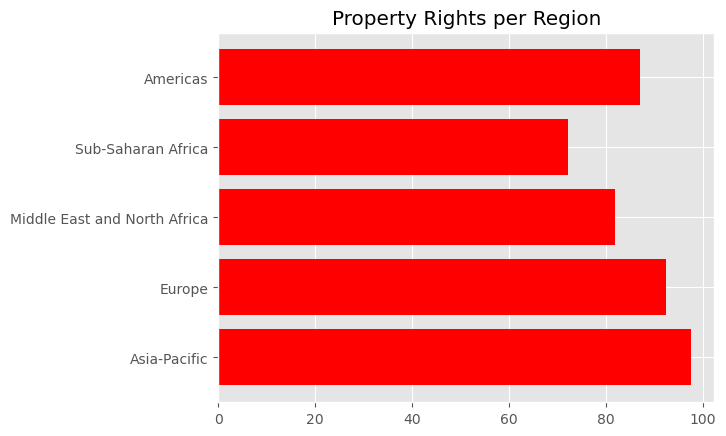

In [1138]:
plt.barh(data3['Region'], data3['Property Rights'], color='r')
plt.title('Property Rights per Region')
plt.show()

Text(0.5, 1.0, 'Frequency of Region for Upper tier Property Rights')

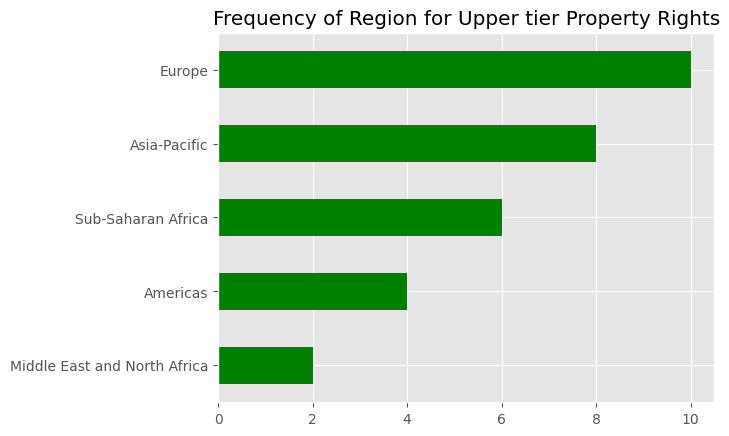

In [1145]:
region_propU.value_counts().sort_values().plot(kind='barh',color='g')
plt.title('Frequency of Region for Upper tier Property Rights')

Text(0.5, 1.0, 'Frequency of Region for Upper tier Judicial Effectiveness')

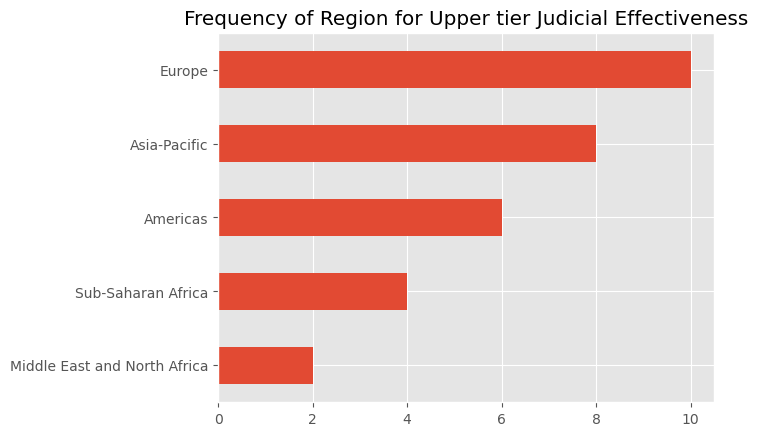

In [1146]:
region_JudU.value_counts().sort_values().plot(kind='barh')
plt.title('Frequency of Region for Upper tier Judicial Effectiveness')

Text(0.5, 1.0, 'Frequency of Region for Upper tier Government Integrity')

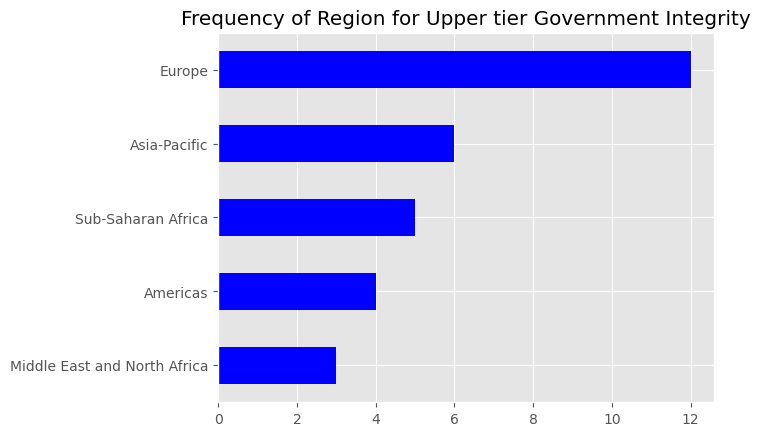

In [1147]:
region_IntU.value_counts().sort_values().plot(kind='barh',color='blue')
plt.title('Frequency of Region for Upper tier Government Integrity')

Text(0.5, 1.0, 'Frequency of Region for Bottom tier Government Integrity')

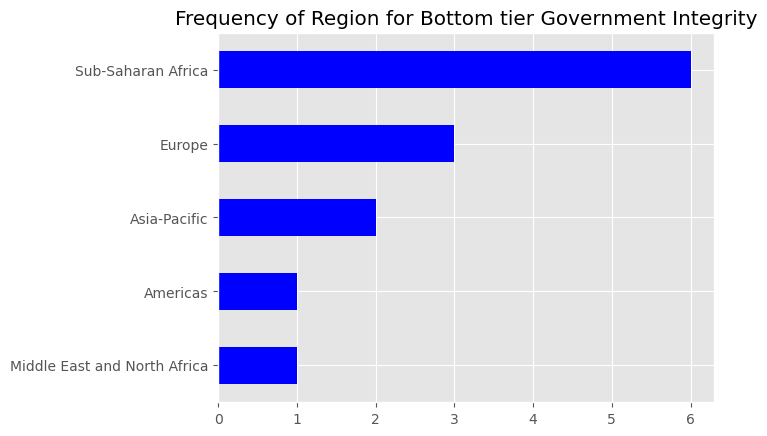

In [1148]:
region_IntB.value_counts().sort_values().plot(kind='barh',color='blue')
plt.title('Frequency of Region for Bottom tier Government Integrity')

Text(0.5, 1.0, 'Frequency of Region for Bottom tier Judicial Effectiveness')

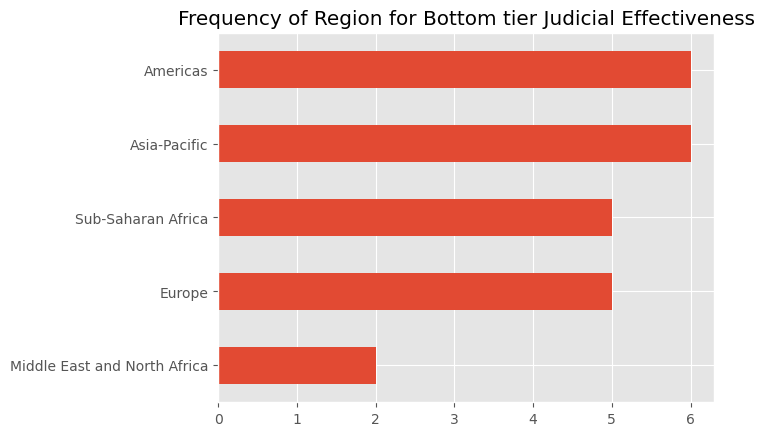

In [1150]:
region_JudB.value_counts().sort_values().plot(kind='barh')
plt.title('Frequency of Region for Bottom tier Judicial Effectiveness')

Text(0.5, 1.0, 'Frequency of Region for Bottom tier Property Rights')

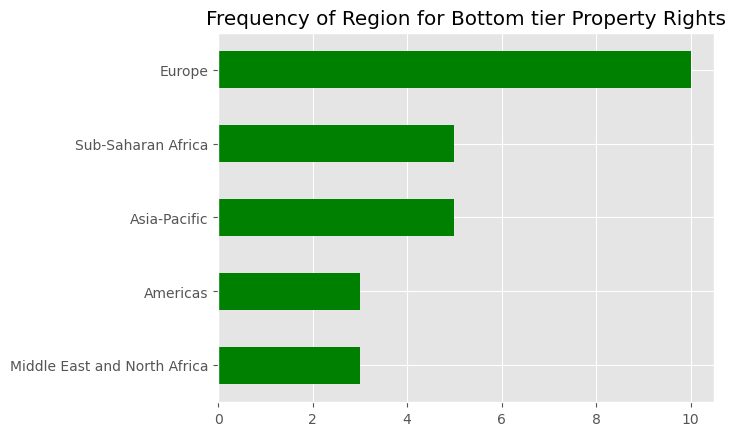

In [1151]:
region_propB.value_counts().sort_values().plot(kind='barh', color='g')
plt.title('Frequency of Region for Bottom tier Property Rights')